<a href="https://colab.research.google.com/github/a-donat/InProgress/blob/main/LTV_Car_Insurance/Predict_Car_Insurance_LTV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Load Libraries and Download Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ranja7/vehicle-insurance-customer-data
! unzip '/content/vehicle-insurance-customer-data.zip' -d '/content/data'

In [ ]:
! pip install mlinsights

In [ ]:
! unzip '/content/Relationships' -d '/content/'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import sys
import importlib
from typing import *
from sklearn.model_selection import train_test_split

# II. Load Data and Check Data Integrity

"**About Dataset**<br>
**Context**<br>
This is customer data with their vehicle insurance policies. Details about customers and the insurance taken for their vehicles are provided which can be explored to segment similar kind of customers.

**Content**<br>
The socio-economic data of the customer with details about the insured vehicle is the data content. Data contains both categorical and numerical variables. The customer lifetime value based on historical data has also been provided which is essential in understanding the customer purchase behavior.

**Acknowledgements**<br>
UCI ML repository

**Inspiration**<br>
The data is useful for clustering customers according to their behavior, thereby enabling targeted marketing of a new insurance policy. This helps pre-estimating a budget for marketing expenses." -
kaggle user and data poster RANJA SARKAR (SHE/HER)
<br> https://www.kaggle.com/datasets/ranja7/vehicle-insurance-customer-data/data

Load Data:

In [5]:
ltv_df = pd.read_csv("/content/data/AutoInsurance.csv")

Preview Data:

In [6]:
ltv_df

Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor           2/24/11         Employed      F   56274  ...   
1     Bachelor           1/31/11       Unemployed      F       0  ...   
2     Bachelor           2/19/11         Employed      F   48767  ...   
3     Bachelor           1/20/11       Unemployed      M       0  ...   
4     Bachelor          3/2/2011         Employed      M   43836  ...   
...        ...               ...              ...    ...     ...  ...   
9129  Bachelor         10/2/2011         Employed      M   71941  ...   
9130   College         12/2/2011         Employed      F   21604  ...   
9131  Bachelor          6/2/2011       Unemployed      M       0  ...   
9132   College          3/2/2011         Employed      M   21941  ...   
9133   College           2/14/11       Unemployed      M       0  ...   

     Months Since Policy Inception Number of Open Complaints  \
0                                5                         0   
1                               42                         0   
2                               38                         0   
3                               65                         0   
4                               44                         0   
...                            ...                       ...   
9129                            89                         0   
9130                            28                         0   
9131                            37                         3   
9132                             3                         0   
9133                            90                         0   

      Number of Policies     Policy Type        Policy  Renew Offer Type  \
0                      1  Corporate Auto  Corporate L3            Offer1   
1                      8   Personal Auto   Personal L3            Offer3   
2                      2   Personal Auto   Personal L3            Offer1   
3                      7  Corporate Auto  Corporate L2            Offer1   
4                      1   Personal Auto   Personal L1            Offer1   
...                  ...             ...           ...               ...   
9129                   2   Personal Auto   Personal L1            Offer2   
9130                   1  Corporate Auto  Corporate L3            Offer1   
9131                   2  Corporate Auto  Corporate L2            Offer1   
9132                   3   Personal Auto   Personal L2            Offer3   
9133                   1  Corporate Auto  Corporate L3            Offer4   

      Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent         384.811147   Two-Door Car      Medsize  
1             Agent        1131.464935  Four-Door Car      Medsize  
2             Agent         566.472247   Two-Door Car      Medsize  
3       Call Center         529.881344            SUV      Medsize  
4             Agent         138.130879  Four-Door Car      Medsize  
...             ...                ...            ...          ...  
9129            Web         198.234764  Four-Door Car      Medsize  
9130         Bran



*   No issues detected in preview.


Check the data type for each column and for missing values:

In [7]:
ltv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i



*   No missing values
*   Need to convert <code>Effective To Date</code> column to datetime format
*   All other data types are correct



In [12]:
ltv_df["Effective To Date"] = pd.to_datetime(ltv_df["Effective To Date"])

Check number of unique values in each column:

In [8]:
ltv_df.nunique()

Customer                         9134
State                               5
Customer Lifetime Value          8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Renew Offer Type                    4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64



*   Looks good. Note that each observation in the dataset corresponds to a unique customer.


Check minimum and maximum values

In [21]:
ltv_df[
    [c for c in list(ltv_df) if str(ltv_df[c].dtype) in
     ['float64', 'int64', 'datetime64[ns]']]].min()

Customer Lifetime Value                  1898.007675
Effective To Date                2011-01-01 00:00:00
Income                                             0
Monthly Premium Auto                              61
Months Since Last Claim                            0
Months Since Policy Inception                      0
Number of Open Complaints                          0
Number of Policies                                 1
Total Claim Amount                          0.099007
dtype: object

In [22]:
ltv_df[
    [c for c in list(ltv_df) if str(ltv_df[c].dtype) in
     ['float64', 'int64', 'datetime64[ns]']]].max()

Customer Lifetime Value                  83325.38119
Effective To Date                2011-12-02 00:00:00
Income                                         99981
Monthly Premium Auto                             298
Months Since Last Claim                           35
Months Since Policy Inception                     99
Number of Open Complaints                          5
Number of Policies                                 9
Total Claim Amount                       2893.239678
dtype: object


*   Looks good.


# III. Data Preprocessing

Convert the `Effective To Date` column to integer format. Each observation will represent the difference (in days) between that `Effective To Date` value and the earliest `Effective To Date` value in the dataset.

In [25]:
ltv_df["Effective To Date"] = (
    ltv_df["Effective To Date"] - ltv_df["Effective To Date"].min()).dt.days

In [26]:
ltv_df["Effective To Date"].min()

0

In [27]:
ltv_df["Effective To Date"].max()

335

In [64]:
ltv_df["Policy Level"] = ltv_df["Policy"].str.split("\s+", expand=True)[1]

In [69]:
ltv_train, ltv_test = train_test_split(ltv_df, test_size=.15, random_state=1)

# IV. Data Exploration

## IV.A. Data Visualization

In [50]:
def plot_hist_categorical_x_numeric(
        df: pd.core.frame.DataFrame, catg_vars: List[str], numr_var: str,
        fig_size_mult: Union[int, float] = 2,
        n_bins: int = 20, alphabetize_cat_vals: bool = True,
        var_orders: Optional[Dict[str, List]] = None,
        alphas: Union[int, float, List[Union[int, float]]] = .75,
        keep_x_tick_labels: bool = False,
        keep_y_tick_labels: bool = False,
        color_list: Optional[List[str]] = None,
        code_to_label: Optional[Dict[str, str]] = None):
    """ similar to plot_categorical_x_numeric, but with histograms

    Parameters
    ------------
    df : pandas DataFrame
    catg_vars : list[str]
        - each item in var_list is the name of a column in df that contains
          categorical values.
    numr_var : str
        - the name of a column in df that contains
          numerical (and preferably continuous) values.
    fig_size_mult : float or int
        0 < fig_size_mult
        figsize=(len(var_list) * fig_size_mult, len(var_list) * fig_size_mult)
    var_orders : None or {catg_a: [catg_a_value1, catg_a_value2], ...}
    n_bins : int
        2 < n_bins
        number of bins to use in histogram
    alphabetize_cat_vals: bool
        any item in var_orders overrides alphabetical or frequency order
        if True, the values for each category are plotted in alphabetical order,
        meaning the alphabetically first value will be plotted in the first
        color in color_list. if False, the values will be plotted in descending
        order of their frequency.
    alphas: list of ints/floats or a single int or float
    keep_x_tick_labels, keep_y_tick_labels: bool
        if set to False, tick marks will be unlabeled
    color_list : List[str]
        if target_discrete is true, then color_list contains names of the
        colors that will correspond to each category of the target_var
        after sorting
    code_to_label : None or {"column_name": "Column Label"}

    #TODO
    ------
    1. Add option for alpha to decrease in each loop
    2. Add option for circular/cyclical variables (ex. time of day)

    Notes
    ------
    see add_noise() for explanation of .replace("_noisy", "")

    Returns
    ------------
    None
    """
    if color_list is None:
        color_list = ["Blue", "Red", "Green", "Orange",
                      "RebeccaPurple", "Gray", "Pink",
                      "Gold", "Maroon"]
    if var_orders is None:
        var_orders = {}

    if code_to_label is None:
        code_to_label = {}

    if type(alphas) is list:
        alphas += [alphas[-1]] * len(color_list)
    else:
        alphas = [alphas] * len(color_list)

    fig, axes = plt.subplots(ncols=len(catg_vars),
                             figsize=(len(catg_vars) * fig_size_mult,
                                      fig_size_mult))
    all_class_min = df[numr_var].min()
    all_class_max = df[numr_var].max()
    bin_width = (all_class_max - all_class_min) / n_bins
    hist_bins = np.arange(all_class_min,
                          all_class_max + bin_width, bin_width)
    for i, catg in enumerate(catg_vars):
        if catg in var_orders.keys():
            catg_order = var_orders[catg]
        elif alphabetize_cat_vals:
            catg_order = sorted(df[catg].unique().tolist())
        else:
            catg_order = df[catg].value_counts().index.to_list()
        if len(catg_order) > len(color_list):
            color_warning = "%s has %d unique values, color_list has %d." % (
                catg, df[catg].nunique(), len(color_list))
            raise Warning(color_warning)
        catg_order = catg_order[:min(len(catg_order), len(color_list))]
        for j, cat_val in enumerate(catg_order):
            axes[i].hist(x=df[df[catg] == cat_val][numr_var], bins=hist_bins,
                         color=color_list[j], alpha=alphas[j])
        # formatting: remove tick labels
        if (i > 0) and (not keep_x_tick_labels):
            axes[i].set_xticklabels([])
        if (i > 0) and (not keep_y_tick_labels):
            axes[i].set_yticklabels([])
        # formatting: label axes
        if catg in code_to_label.keys():
            label_text = code_to_label[catg]
        else:
            label_text = catg.replace(" ", "\n")
        axes[i].set_xlabel(label_text)
    axes[0].set_ylabel("Counts", rotation=0, ha="right", va="center")
    plt.show()

In [36]:
print([c for c in list(ltv_df) if ltv_df[c].nunique() <= 8])

['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Number of Open Complaints', 'Policy Type', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']


In [47]:
ltv_train["Customer Lifetime Value"].describe(percentiles=[.9, .95, .99, .995])

count     7763.000000
mean      8052.314717
std       6977.632769
min       1898.007675
50%       5791.610721
90%      15512.501386
95%      22300.893399
99%      36560.311314
99.5%    41956.601754
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [71]:
ltv_train[
    "Customer Lifetime Value clipped"] = ltv_train[
        "Customer Lifetime Value"].clip(upper=ltv_train[
        "Customer Lifetime Value"].quantile(.995))

In [67]:
cat_personal_vars = [
    'State', 'Location Code', 'Education', 'EmploymentStatus', 'Gender',
    'Marital Status', 'Vehicle Class', 'Vehicle Size']
cat_policy_vars = [
    'Coverage', 'Number of Open Complaints', 'Policy Type', 'Policy Level',
    'Renew Offer Type', 'Sales Channel', 'Response']

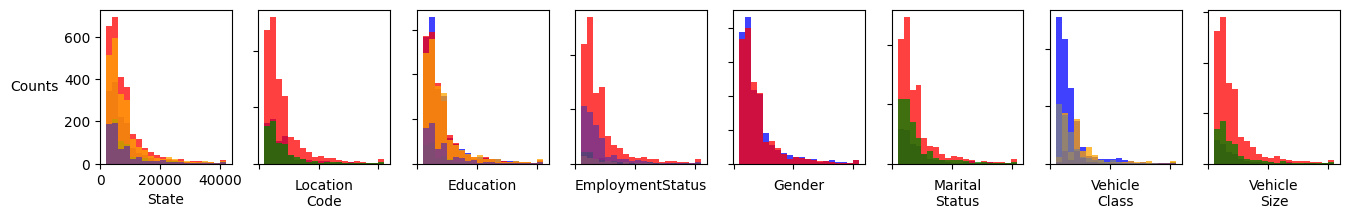

In [51]:
plot_hist_categorical_x_numeric(
    ltv_train, cat_personal_vars, "Customer Lifetime Value clipped")

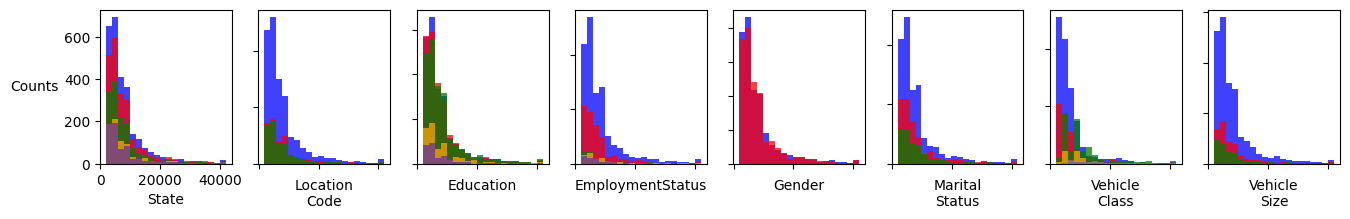

In [52]:
plot_hist_categorical_x_numeric(
    ltv_train, cat_personal_vars, "Customer Lifetime Value clipped",
    alphabetize_cat_vals=False)

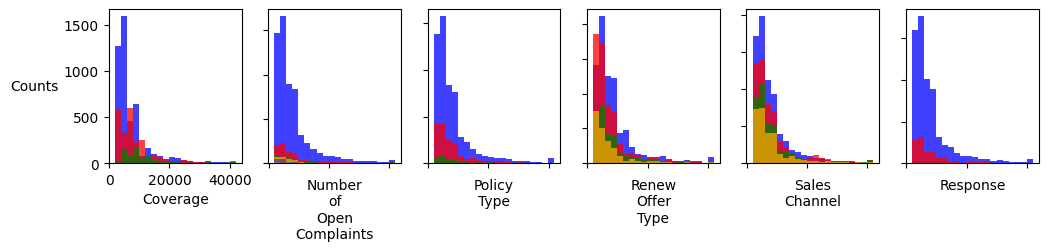

In [53]:
plot_hist_categorical_x_numeric(
    ltv_train, cat_policy_vars, "Customer Lifetime Value clipped",
    alphabetize_cat_vals=False)

In [54]:
import Relationships.VisualizeData

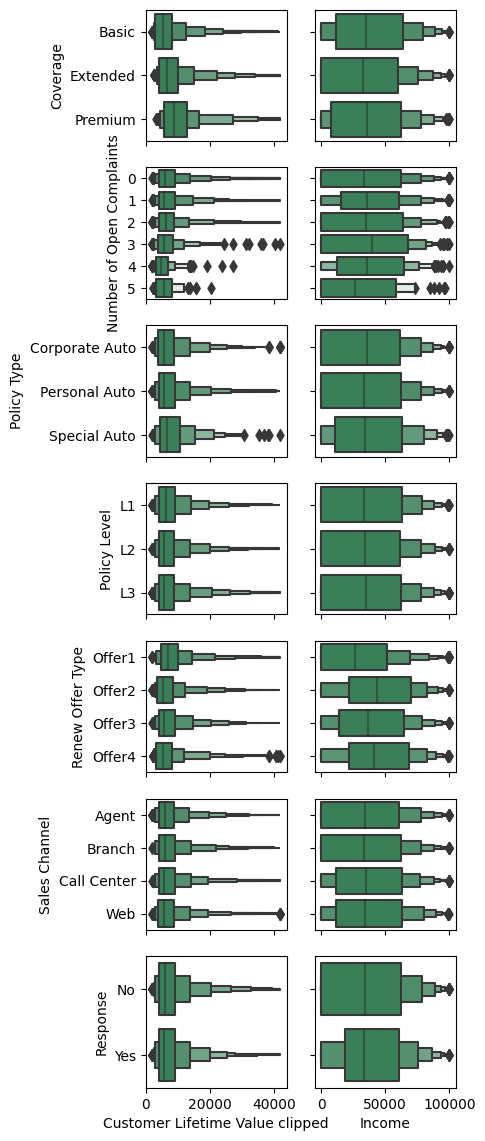

In [72]:
Relationships.VisualizeData.plot_categorical_x_numeric(
    ltv_train, cat_policy_vars, ["Customer Lifetime Value clipped", "Income"])

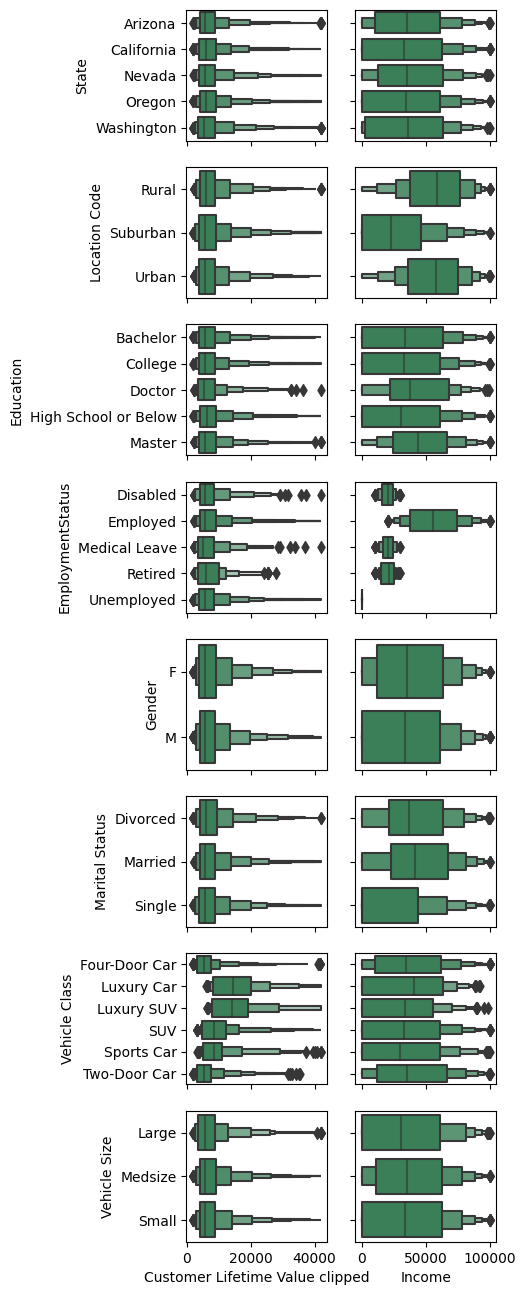

In [58]:
Relationships.VisualizeData.plot_categorical_x_numeric(
    ltv_train, cat_personal_vars, ["Customer Lifetime Value clipped", "Income"])

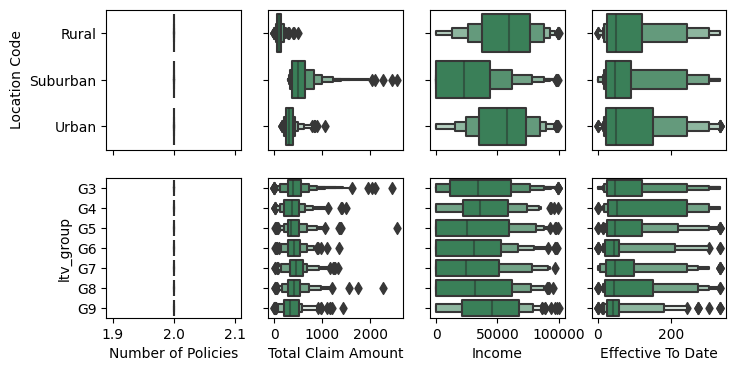

In [214]:
Relationships.VisualizeData.plot_categorical_x_numeric(
    ltv_train_2pol, ["Location Code", "ltv_group"],
     ["Number of Policies", "Total Claim Amount", "Income", "Effective To Date"])

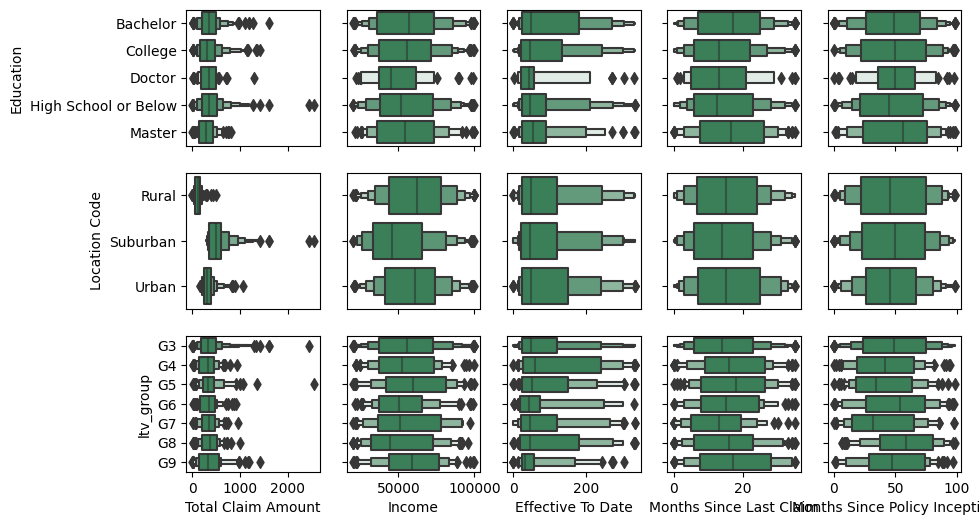

In [556]:
Relationships.VisualizeData.plot_categorical_x_numeric(
    ltv_train_2pol[ltv_train_2pol["EmploymentStatus"]=="Employed"],
     ["Education", "Location Code", "ltv_group"],
     ["Total Claim Amount", "Income", "Effective To Date", "Months Since Last Claim", "Months Since Policy Inception"])

In [ ]:
plot_hist_categorical_x_numeric(
    ltv_train_2pol, ["ltv_group", "Location Code"], "Customer Lifetime Value clipped")

In [ ]:
ltv_train_2pol[""]

In [61]:
print([c for c in list(ltv_train) if ltv_train[c].nunique()>8])

['Customer', 'Customer Lifetime Value', 'Effective To Date', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Policies', 'Policy', 'Total Claim Amount', 'Customer Lifetime Value clipped']


In [62]:
ltv_train["Policy"].value_counts()

Personal L3     2880
Personal L2     1815
Personal L1     1072
Corporate L3     855
Corporate L2     507
Corporate L1     309
Special L2       136
Special L3       133
Special L1        56
Name: Policy, dtype: int64

In [75]:
cont_vars = [
    'Customer Lifetime Value clipped', 'Monthly Premium Auto',
    'Total Claim Amount', 'Effective To Date', 'Income',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Policies']

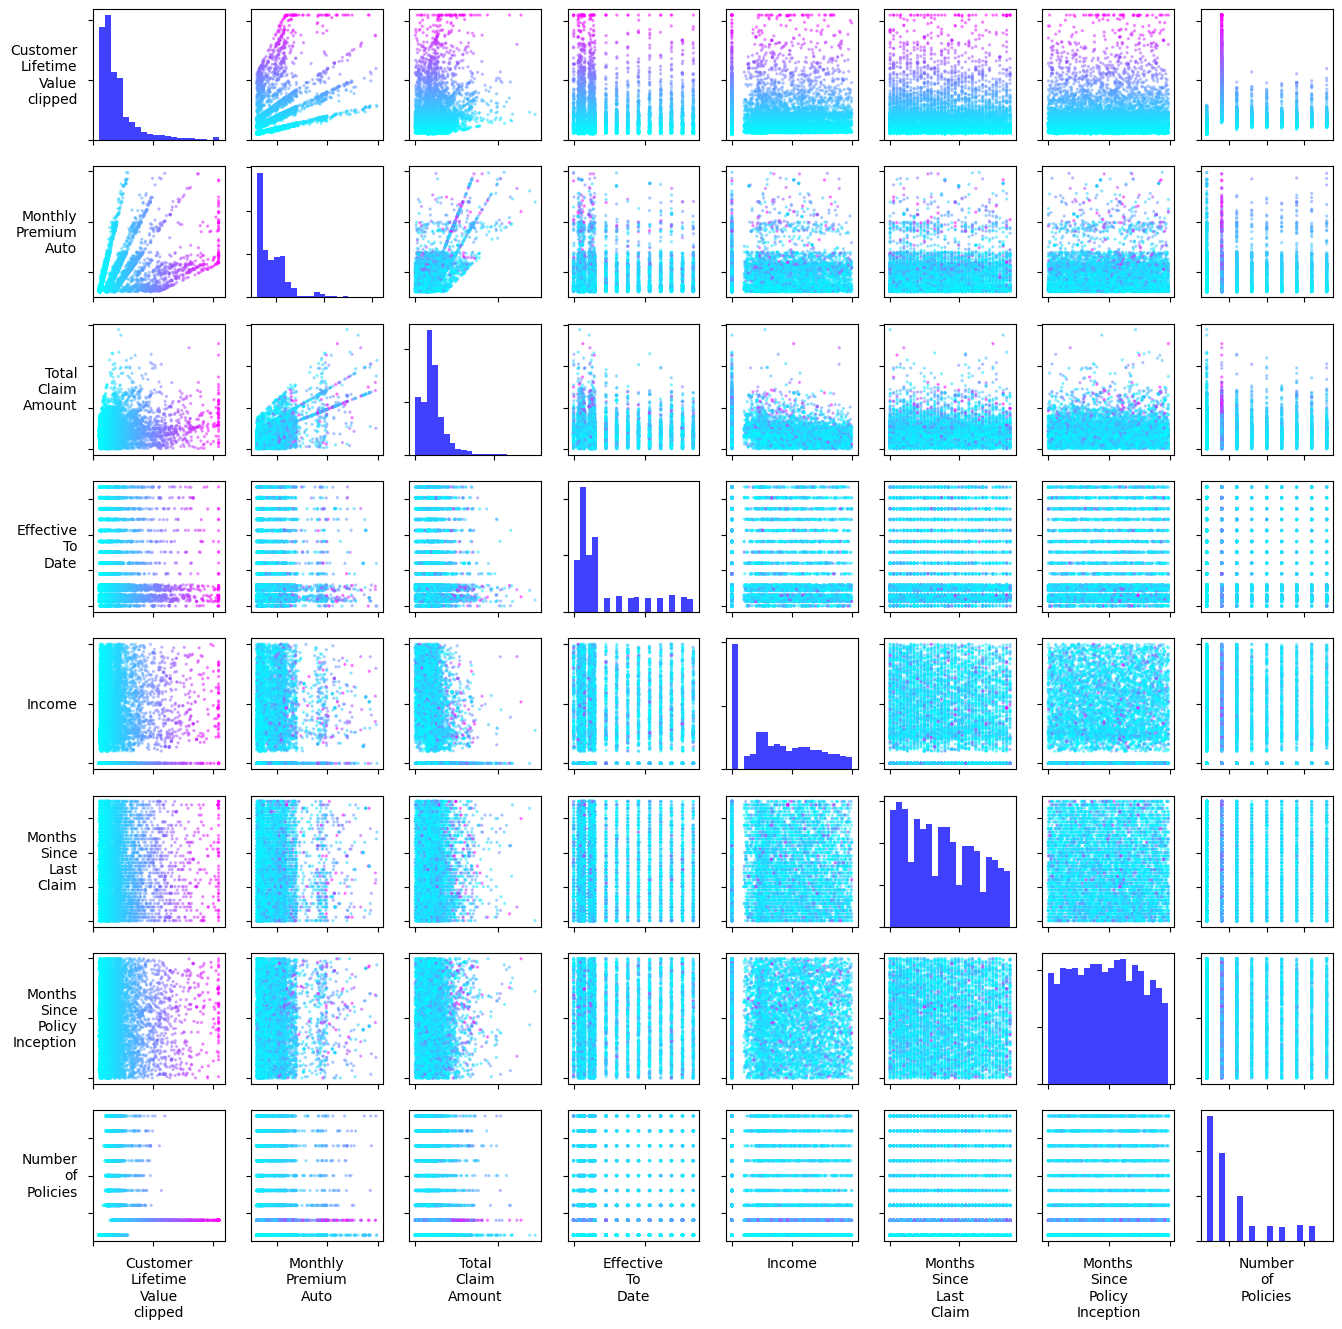

In [76]:
Relationships.VisualizeData.custom_pair_plot(
    ltv_train, cont_vars, "Customer Lifetime Value clipped",
    target_discrete=False)

In [83]:
60*50

3000

In [118]:
ltv_group_cutoffs = ltv_train[
    ["Customer", "Monthly Premium Auto", "Customer Lifetime Value"]].copy()

In [121]:
ltv_group_cutoffs["co1"] = ltv_group_cutoffs["Monthly Premium Auto"]*40 + 30
ltv_group_cutoffs["co2"] = ltv_group_cutoffs["Monthly Premium Auto"]*80 + 170
ltv_group_cutoffs["co3"] = ltv_group_cutoffs["Monthly Premium Auto"]*120 + 600
ltv_group_cutoffs["co4"] = ltv_group_cutoffs["Monthly Premium Auto"]*160 + 600
ltv_group_cutoffs["co5"] = ltv_group_cutoffs["Monthly Premium Auto"]*200 + 600
ltv_group_cutoffs["co6"] = ltv_group_cutoffs["Monthly Premium Auto"]*240 + 600
ltv_group_cutoffs["co7"] = ltv_group_cutoffs["Monthly Premium Auto"]*280 + 600
ltv_group_cutoffs["co8"] = ltv_group_cutoffs["Monthly Premium Auto"]*320 + 600

In [119]:
def assign_group(row):
  for i in range(1, 9):
    if row["Customer Lifetime Value"] <= row["co%d" % i]:
      return "G%d" % i
  return "G9"

In [122]:
ltv_group_cutoffs["ltv_group"] = ltv_group_cutoffs.apply(
    lambda row: assign_group(row), axis=1)

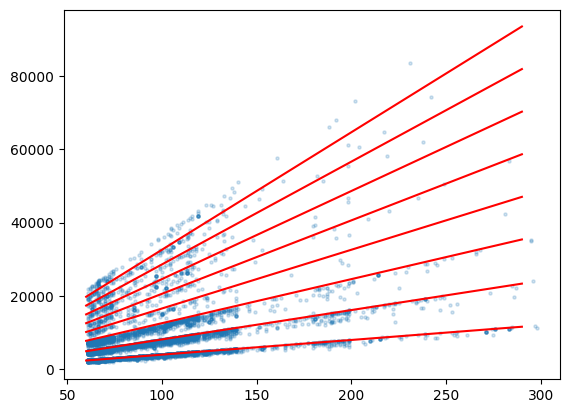

In [111]:
plt.scatter(
    ltv_train["Monthly Premium Auto"], ltv_train["Customer Lifetime Value"],
    alpha=.2, s=5)
plt.plot(np.arange(60, 300, 10), np.arange(60, 300, 10)*40 + 30, color="red")
plt.plot(np.arange(60, 300, 10), np.arange(60, 300, 10)*80 + 170, color="red")
plt.plot(np.arange(60, 300, 10), np.arange(60, 300, 10)*120 + 600, color="red")
plt.plot(np.arange(60, 300, 10), np.arange(60, 300, 10)*160 + 600, color="red")
plt.plot(np.arange(60, 300, 10), np.arange(60, 300, 10)*200 + 600, color="red")
plt.plot(np.arange(60, 300, 10), np.arange(60, 300, 10)*240 + 600, color="red")
plt.plot(np.arange(60, 300, 10), np.arange(60, 300, 10)*280 + 600, color="red")
plt.plot(np.arange(60, 300, 10), np.arange(60, 300, 10)*320 + 600, color="red")




In [125]:
ltv_group_cutoffs["ltv_group"].value_counts()

G2    3280
G1    2521
G3    1162
G6     156
G5     135
G7     132
G8     129
G4     129
G9     119
Name: ltv_group, dtype: int64

In [127]:
ltv_train["ltv_group"] = ltv_train["Customer"].map(
    ltv_group_cutoffs.set_index("Customer")["ltv_group"].to_dict())

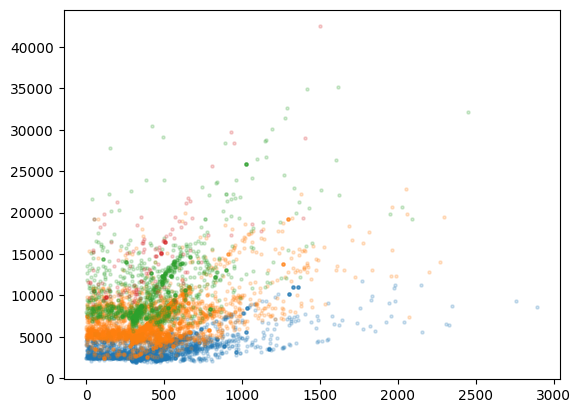

In [128]:
for cl in ["G1", "G2", "G3", "G4"]:
  plt.scatter(data=ltv_train[ltv_train["ltv_group"]==cl],
              x= "Total Claim Amount", y="Customer Lifetime Value",
              alpha=.2, s=5)

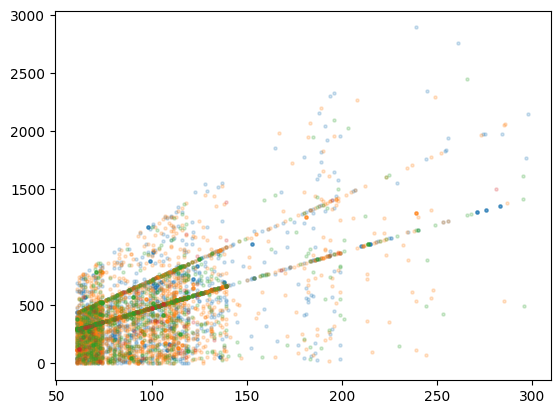

In [131]:
for cl in ["G1", "G2", "G3", "G4"]:
  plt.scatter(data=ltv_train[ltv_train["ltv_group"]==cl],
              x="Monthly Premium Auto", y="Total Claim Amount",
              alpha=.2, s=5)

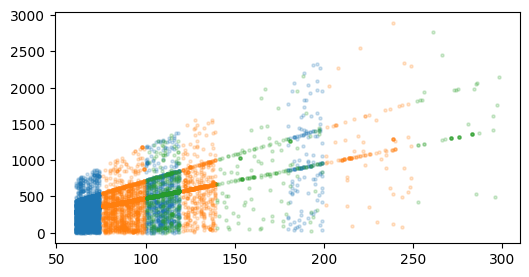

In [137]:
temp_var = "Coverage"
fig, ax = plt.subplots(figsize=(6, 3))

for cl in ltv_train[temp_var].unique():
  ax.scatter(data=ltv_train[ltv_train[temp_var]==cl],
              x="Monthly Premium Auto", y="Total Claim Amount",
              alpha=.2, s=5)
plt.show()

In [155]:
ltv_train["Coverage"].value_counts()

Basic       4695
Extended    2368
Premium      700
Name: Coverage, dtype: int64

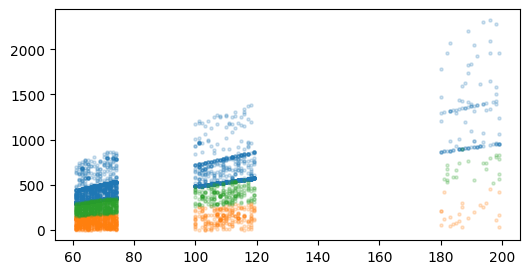

In [157]:
temp_var = "Location Code"
fig, ax = plt.subplots(figsize=(6, 3))

for cl in ltv_train[temp_var].unique():
  ax.scatter(data=ltv_train[
      (ltv_train["Coverage"]=="Basic") & (ltv_train[temp_var]==cl)],
             x="Monthly Premium Auto", y="Total Claim Amount",
             alpha=.2, s=5)

In [303]:
claim_pred = ltv_train[
    ["Customer", "Location Code", "Monthly Premium Auto", "Total Claim Amount"]
    ].copy()


In [304]:
claim_pred

Customer Location Code  Monthly Premium Auto  Total Claim Amount
1910  EN72010      Suburban                    70          336.000000
4053  HG23705         Rural                    73            9.160139
2545  JV80614         Rural                    73           55.320014
3169  AC58002         Urban                    71          189.907577
7507  YP29527         Rural                   103           37.802583
...       ...           ...                   ...                 ...
2895  XQ74827      Suburban                   249         2294.631639
7813  No19664      Suburban                    71          475.166267
905   IW54795      Suburban                    99          607.095655
5192  ZT31931      Suburban                    95          579.452318
235   BH36570      Suburban                    73          350.400000

[7763 rows x 4 columns]

In [307]:
claim_pred["ll_mult"] = claim_pred["Location Code"].map(
    {"Rural": 0, "Urban": 2.5, "Suburban": 4.8})
claim_pred["ll_add"] = claim_pred["Location Code"].map(
    {"Rural": 0, "Urban": 0, "Suburban": -10})
claim_pred["ul_mult"] = claim_pred["Location Code"].map(
    {"Rural": 2.5, "Urban": 4.9, "Suburban": 7.5})
claim_pred["ul_add"] = claim_pred["Location Code"].map(
    {"Rural": 0, "Urban": 0, "Suburban": 0})

In [308]:
claim_pred["ll"] = claim_pred["ll_mult"] * claim_pred["Monthly Premium Auto"] + claim_pred["ll_add"]
claim_pred["ul"] = claim_pred["ul_mult"] * claim_pred["Monthly Premium Auto"] + claim_pred["ul_add"]

In [309]:
claim_pred["rel_claim"] = (
    claim_pred["Total Claim Amount"] - claim_pred["ll"])/(
        claim_pred["ul"] - claim_pred["ll"])

In [310]:
ltv_train["rel_claim"] = ltv_train["Customer"].map(
    claim_pred.set_index("Customer")["rel_claim"].to_dict())

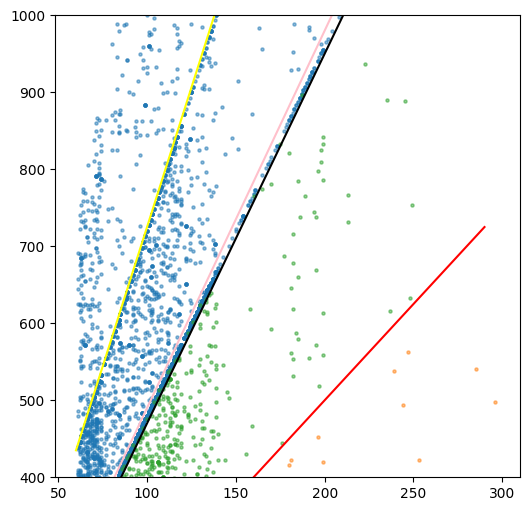

In [306]:
temp_var = "Location Code"
fig, ax = plt.subplots(figsize=(6, 6))

for cl in ltv_train[temp_var].unique():
  #if cl == "Rural":
  if True:
    ax.scatter(data=ltv_train[ltv_train[temp_var]==cl],
                x="Monthly Premium Auto", y="Total Claim Amount",
                alpha=.5, s=5)
ax.plot(np.arange(60, 300, 10), 2.5 * np.arange(60, 300, 10), color="red")
ax.plot(np.arange(60, 300, 10), 4.9 * np.arange(60, 300, 10), color="pink")
ax.plot(np.arange(60, 300, 10), 4.8 * np.arange(60, 300, 10)-10, color="black")
ax.plot(np.arange(60, 300, 10), 7.25 * np.arange(60, 300, 10), color="yellow")



ax.set_ylim((400,1000))
plt.show()

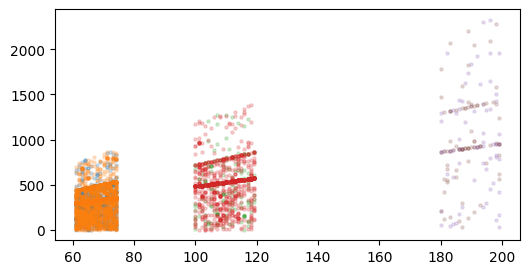

In [161]:
temp_var = "Vehicle Class"
fig, ax = plt.subplots(figsize=(6, 3))

for cl in ltv_train[temp_var].unique():
  ax.scatter(data=ltv_train[
      (ltv_train["Coverage"]=="Basic") & (ltv_train[temp_var]==cl)],
             x="Monthly Premium Auto", y="Total Claim Amount",
             alpha=.2, s=5)

In [173]:
pd.crosstab(ltv_train["ltv_group"], ltv_train["Policy"], normalize="index").round(2)

Policy     Corporate L1  Corporate L2  Corporate L3  Personal L1  Personal L2  \
ltv_group                                                                       
G1                 0.04          0.07          0.12         0.12         0.24   
G2                 0.03          0.07          0.11         0.15         0.23   
G3                 0.05          0.06          0.10         0.15         0.23   
G4                 0.07          0.06          0.13         0.12         0.21   
G5                 0.02          0.01          0.05         0.14         0.27   
G6                 0.08          0.07          0.13         0.11         0.27   
G7                 0.05          0.05          0.11         0.13         0.26   
G8                 0.03          0.04          0.11         0.18         0.20   
G9                 0.05          0.03          0.09         0.09         0.24   

Policy     Personal L3  Special L1  Special L2  Special L3  
ltv_group                                                   
G1                0.37        0.01        0.01        0.02  
G2                0.37        0.00        0.02        0.02  
G3                0.37        0.01        0.02        0.01  
G4                0.33        0.01        0.02        0.04  
G5                0.43        0.01        0.04        0.02  
G6                0.28        0.00        0.03        0.03  
G7                0.37        0.02        0.01        0.02  
G8                0.42        0.00        0.02        0.01  
G9                0.40        0.02        0.03        0.04

In [ ]:
pd.crosstab(ltv_train["ltv_group"], ltv_train["Policy"], normalize="index").round(2)

In [335]:
print(cat_policy_vars)

['Coverage', 'Number of Open Complaints', 'Policy Type', 'Policy Level', 'Renew Offer Type', 'Sales Channel', 'Response']


A    620
B    228
C     28
Name: vehicle class group, dtype: int64
A
B
C


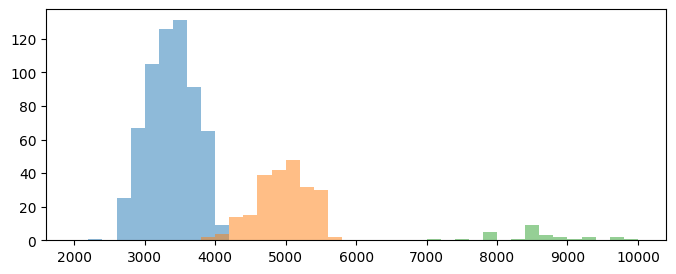

In [390]:
temp_var = "Vehicle Class"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Extended") & (ltv_train["Number of Policies"]==1)].copy()
temp_df["vehicle class group"] = temp_df["Vehicle Class"].map({
    "Two-Door Car": "A", "Sports Car": "B", "Four-Door Car": "A", "SUV": "B",
    "Luxury SUV": "C", "Luxury Car": "C"})
temp_var = "vehicle class group"
print(temp_df[temp_var].value_counts())
for cl in temp_df[temp_var].unique():
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"],
         bins=np.arange(2000, 10200, 200), alpha=.5)
plt.show()

In [391]:
ltv_train["Coverage"].value_counts()

Basic       4695
Extended    2368
Premium      700
Name: Coverage, dtype: int64

B
A
C


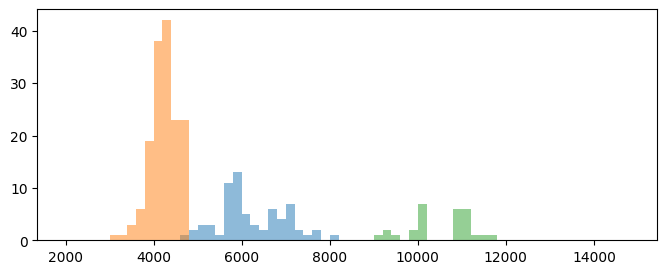

In [393]:
temp_var = "Vehicle Class"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Premium") & (ltv_train["Number of Policies"]==1)].copy()
temp_df["vehicle class group"] = temp_df["Vehicle Class"].map({
    "Two-Door Car": "A", "Sports Car": "B", "Four-Door Car": "A", "SUV": "B",
    "Luxury SUV": "C", "Luxury Car": "C"})
temp_var = "vehicle class group"

for cl in temp_df[temp_var].unique():
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"],
         bins=np.arange(2000, 15000, 200), alpha=.5)
plt.show()

A
B
C


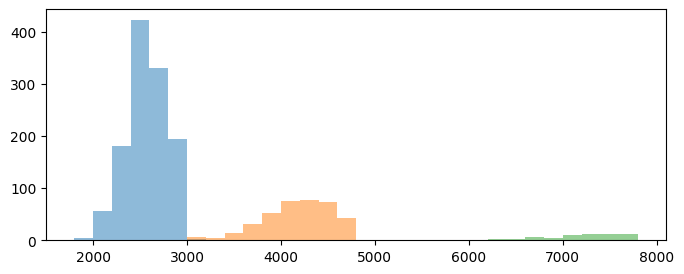

In [383]:
temp_var = "Vehicle Class"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Basic") & (ltv_train["Number of Policies"]==1)].copy()
temp_df["vehicle class group"] = temp_df["Vehicle Class"].map({
    "Two-Door Car": "A", "Sports Car": "B", "Four-Door Car": "A", "SUV": "B",
    "Luxury SUV": "C", "Luxury Car": "C"})
temp_var = "vehicle class group"

for cl in temp_df[temp_var].unique():
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"],
         bins=np.arange(1800, 8000, 200), alpha=.5)
plt.show()

In [400]:
print(cat_personal_vars)

['State', 'Location Code', 'Education', 'EmploymentStatus', 'Gender', 'Marital Status', 'Vehicle Class', 'Vehicle Size']


In [405]:
print(cat_policy_vars)

['Coverage', 'Number of Open Complaints', 'Policy Type', 'Policy Level', 'Renew Offer Type', 'Sales Channel', 'Response']


Suburban
Rural
Urban


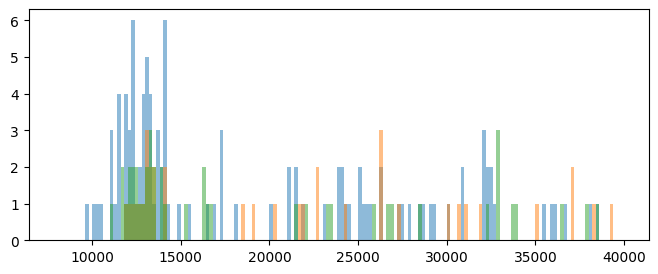

In [421]:
temp_var = "Location Code"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Basic") & (ltv_train["Number of Policies"]==2)
      & (ltv_train["Response"]=="No")
      #& (ltv_train["Renew Offer Type"]=="Offer1")
      & (ltv_train["Vehicle Class"]=="SUV")].copy()

for cl in temp_df[temp_var].unique():
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"],
         bins=np.arange(8000, 40000, 200), alpha=.5)
plt.show()

Personal Auto
Corporate Auto
Special Auto


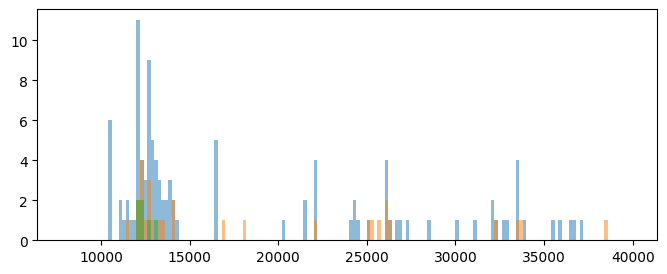

In [422]:
temp_var = "Policy Type"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Basic") & (ltv_train["Number of Policies"]==2)
      #& (ltv_train["Response"]=="Yes")
      & (ltv_train["Renew Offer Type"]=="Offer1")
      & (ltv_train["Vehicle Class"]=="SUV")].copy()

for cl in temp_df[temp_var].unique():
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"],
         bins=np.arange(8000, 40000, 200), alpha=.5)
plt.show()

Personal Auto
Corporate Auto
Special Auto


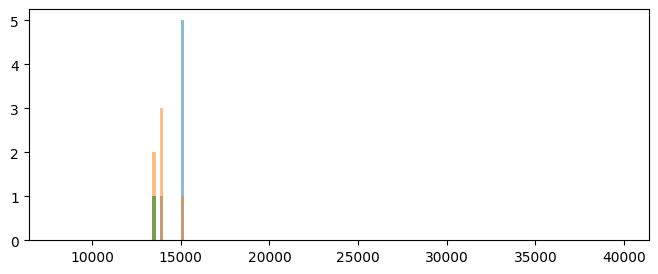

In [417]:
temp_var = "Policy Type"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Basic") & (ltv_train["Number of Policies"]==2)
      & (ltv_train["Response"]=="Yes")
      & (ltv_train["Renew Offer Type"]=="Offer2")
      & (ltv_train["Vehicle Class"]=="SUV")].copy()

for cl in temp_df[temp_var].unique():
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"],
         bins=np.arange(8000, 40000, 200), alpha=.5)
plt.show()

Offer1
Offer2


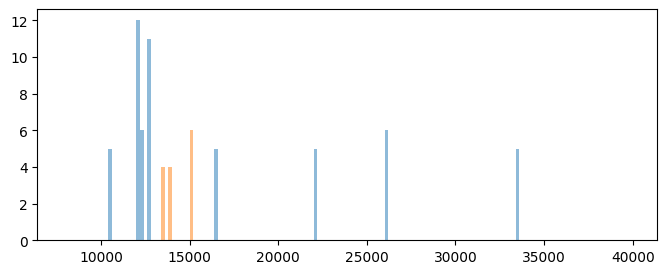

In [414]:
temp_var = "Renew Offer Type"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Basic") & (ltv_train["Number of Policies"]==2)
      & (ltv_train["Response"]=="Yes")
      & (ltv_train["Vehicle Class"]=="SUV")].copy()

for cl in temp_df[temp_var].unique():
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"],
         bins=np.arange(8000, 40000, 200), alpha=.5)
plt.show()

Corporate Auto
Personal Auto
Special Auto


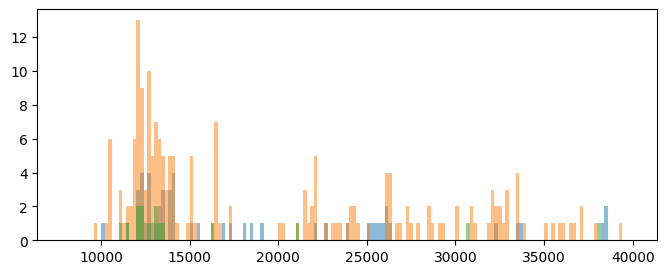

In [407]:
temp_var = "Policy Type"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Basic") & (ltv_train["Number of Policies"]==2)
      & (ltv_train["Vehicle Class"]=="SUV")].copy()

for cl in temp_df[temp_var].unique():
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"],
         bins=np.arange(8000, 40000, 200), alpha=.5)
plt.show()

Corporate Auto
Personal Auto
Special Auto


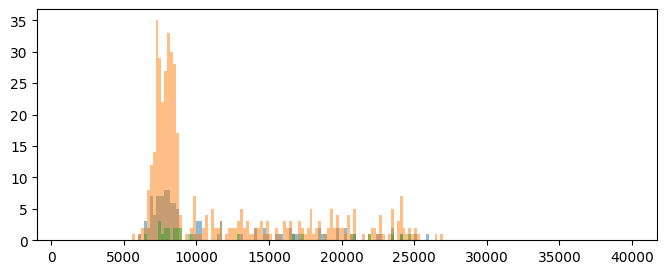

In [424]:
temp_var = "Policy Type"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Basic") & (ltv_train["Number of Policies"]==2)
      & (ltv_train["Vehicle Class"]=="Four-Door Car")].copy()

for cl in temp_df[temp_var].unique():
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"],
         bins=np.arange(1000, 40000, 200), alpha=.5)
plt.show()

Personal Auto
Corporate Auto
Special Auto


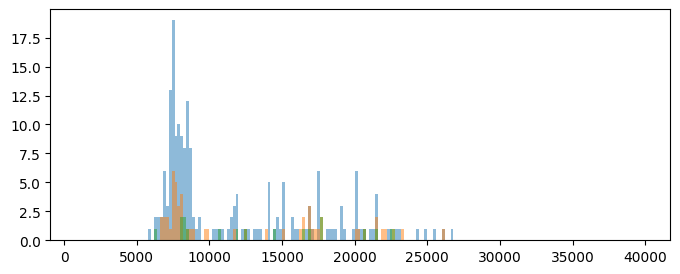

In [425]:
temp_var = "Policy Type"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Basic") & (ltv_train["Number of Policies"]==2)
      & (ltv_train["Vehicle Class"]=="Two-Door Car")].copy()

for cl in temp_df[temp_var].unique():
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"],
         bins=np.arange(1000, 40000, 200), alpha=.5)
plt.show()

A
B
C


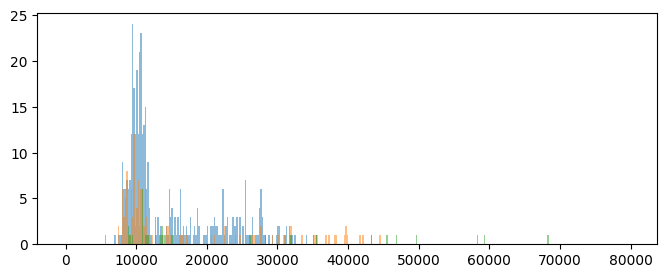

In [437]:
temp_var = "Vehicle Class"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Extended") & (ltv_train["Number of Policies"]==2)].copy()
temp_df["vehicle class group"] = temp_df["Vehicle Class"].map({
    "Two-Door Car": "A", "Sports Car": "B", "Four-Door Car": "A", "SUV": "B",
    "Luxury SUV": "C", "Luxury Car": "C"})
temp_var = "vehicle class group"

for cl in temp_df[temp_var].unique():
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  temp_adj = -5000 if cl == "B" else (-15000 if cl =="C" else 0)
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"] + temp_adj,
         bins=np.arange(0, 80000, 200), alpha=.5)
plt.show()

A
B
C


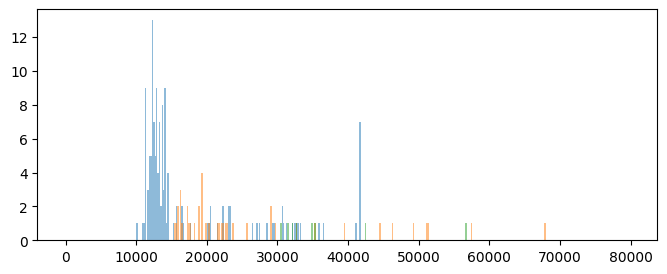

In [438]:
temp_var = "Vehicle Class"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Premium") & (ltv_train["Number of Policies"]==2)].copy()
temp_df["vehicle class group"] = temp_df["Vehicle Class"].map({
    "Two-Door Car": "A", "Sports Car": "B", "Four-Door Car": "A", "SUV": "B",
    "Luxury SUV": "C", "Luxury Car": "C"})
temp_var = "vehicle class group"

for cl in temp_df[temp_var].unique():
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  #temp_adj = -5000 if cl == "B" else (-15000 if cl =="C" else 0)
  temp_adj = 0
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"] + temp_adj,
         bins=np.arange(0, 80000, 200), alpha=.5)
plt.show()

A
B
C


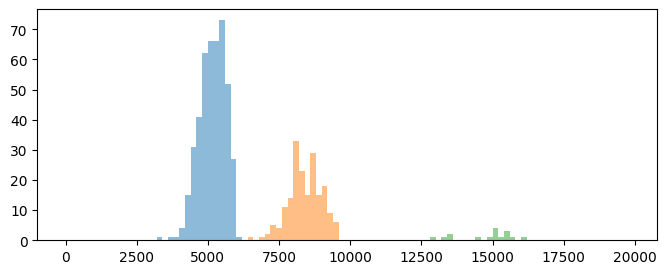

In [441]:
temp_var = "Vehicle Class"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Basic") & (ltv_train["Number of Policies"]==3)].copy()
temp_df["vehicle class group"] = temp_df["Vehicle Class"].map({
    "Two-Door Car": "A", "Sports Car": "B", "Four-Door Car": "A", "SUV": "B",
    "Luxury SUV": "C", "Luxury Car": "C"})
temp_var = "vehicle class group"

for cl in sorted(temp_df[temp_var].unique()):
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  #temp_adj = -5000 if cl == "B" else (-15000 if cl =="C" else 0)
  temp_adj = 0
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"] + temp_adj,
         bins=np.arange(0, 20000, 200), alpha=.5)
plt.show()

A
B
C


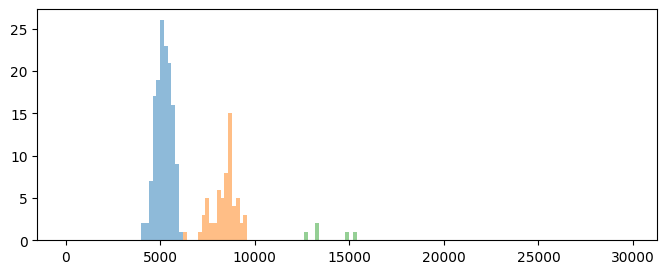

In [445]:
temp_var = "Vehicle Class"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Basic") & (ltv_train["Number of Policies"]==4)].copy()
temp_df["vehicle class group"] = temp_df["Vehicle Class"].map({
    "Two-Door Car": "A", "Sports Car": "B", "Four-Door Car": "A", "SUV": "B",
    "Luxury SUV": "C", "Luxury Car": "C"})
temp_var = "vehicle class group"

for cl in sorted(temp_df[temp_var].unique()):
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  #temp_adj = -5000 if cl == "B" else (-15000 if cl =="C" else 0)
  temp_adj = 0
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"] + temp_adj,
         bins=np.arange(0, 30000, 200), alpha=.5)
plt.show()

In [452]:
ltv_train["vehicle class group"] = ltv_train["Vehicle Class"].map({
    "Two-Door Car": "A", "Sports Car": "B", "Four-Door Car": "A", "SUV": "B",
    "Luxury SUV": "C", "Luxury Car": "C"})

In [453]:
ltv_train["ltv_band"] = ltv_train["vehicle class group"] + "_" + ltv_train[
    "Number of Policies"].astype(str) + "_" + ltv_train["Coverage"]

In [456]:
ltv_train["ltv_band"].value_counts()

A_1_Basic       1194
A_2_Basic        830
A_1_Extended     620
A_3_Basic        441
A_2_Extended     409
                ... 
C_7_Premium        2
B_6_Premium        2
C_8_Premium        1
C_3_Premium        1
C_4_Premium        1
Name: ltv_band, Length: 79, dtype: int64

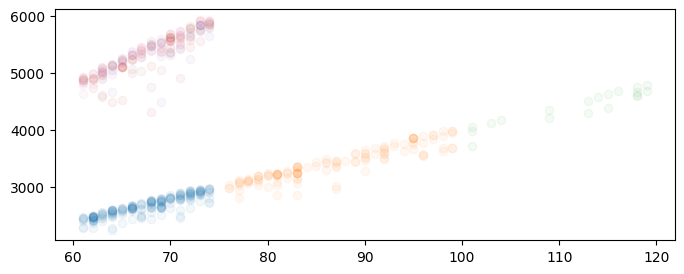

In [467]:
fig, ax = plt.subplots(figsize=(8, 3))

#for cl in sorted(ltv_train[temp_var].unique()):
for cl in ["A_1_Basic", "A_1_Extended", "A_1_Premium",
           #"B_1_Basic",
           "A_3_Basic", "A_4_Basic", "A_5_Basic", "A_6_Basic"]:
  ax.scatter(data = ltv_train[
      (ltv_train["ltv_band"]==cl) & (ltv_train["Location Code"]=="Urban")],
             x="Monthly Premium Auto", y="Customer Lifetime Value", alpha=.05)
plt.show()

In [469]:
ltv_train = Relationships.VisualizeData.add_noise(
    ltv_train, "Monthly Premium Auto")

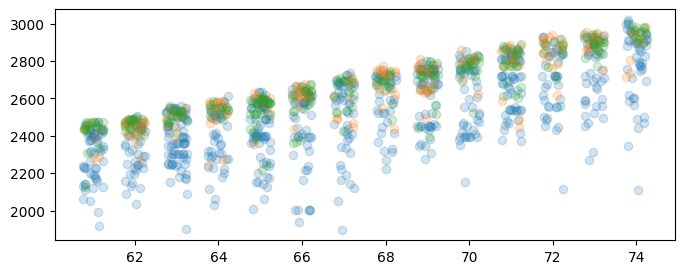

In [471]:
fig, ax = plt.subplots(figsize=(8, 3))

#for cl in sorted(ltv_train[temp_var].unique()):
for cl in ["Suburban", "Urban", "Rural"]:
  ax.scatter(data = ltv_train[
      (ltv_train["ltv_band"]=="A_1_Basic") & (ltv_train["Location Code"]==cl)],
             x="Monthly Premium Auto_noisy", y="Customer Lifetime Value", alpha=.2)
plt.show()

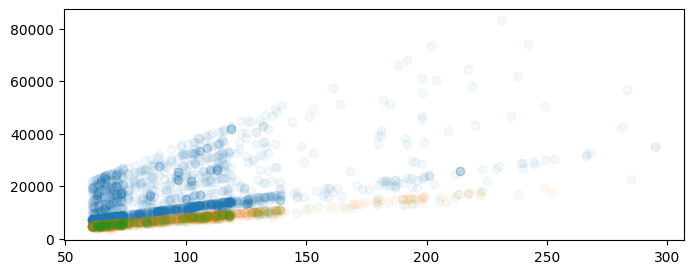

In [581]:
fig, ax = plt.subplots(figsize=(8, 3))

#for cl in sorted(ltv_train[temp_var].unique()):
for cl in [2, 3,4]:
  ax.scatter(data = ltv_train[ltv_train["Number of Policies"]==cl],
             x="Monthly Premium Auto", y="Customer Lifetime Value", alpha=.05)
plt.show()

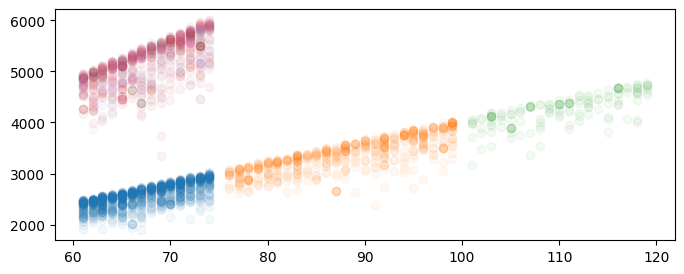

In [466]:
fig, ax = plt.subplots(figsize=(8, 3))

#for cl in sorted(ltv_train[temp_var].unique()):
for cl in ["A_1_Basic", "A_1_Extended", "A_1_Premium",
           #"B_1_Basic",
           "A_3_Basic", "A_4_Basic", "A_5_Basic", "A_6_Basic"]:
  ax.scatter(data = ltv_train[ltv_train["ltv_band"]==cl],
             x="Monthly Premium Auto", y="Customer Lifetime Value", alpha=.05)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))

#for cl in sorted(ltv_train[temp_var].unique()):
for cl in ["Suburban", "Urban", "Rural"]:["A_2_Basic", "A_2_Extended", "A_2_Premium", ]:
  ax.scatter(data = ltv_train[ltv_train["ltv_band"]==cl],
             x="Monthly Premium Auto", y="Customer Lifetime Value", alpha=.05)
plt.show()

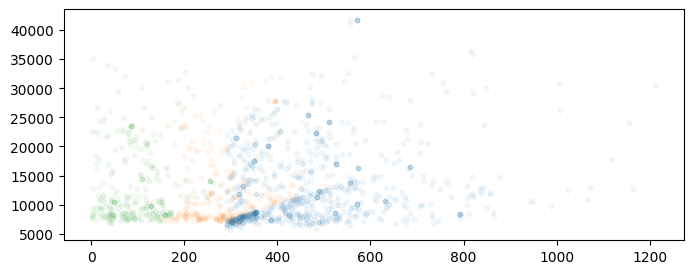

In [477]:
fig, ax = plt.subplots(figsize=(8, 3))

#for cl in sorted(ltv_train[temp_var].unique()):
for cl in ["Suburban", "Urban", "Rural"]:
  ax.scatter(data = ltv_train[
      (ltv_train["ltv_band"].isin(["A_2_Basic", "A_2_Extended", "A_2_Premium"]))
      & (ltv_train["Location Code"]==cl)],
             x="Total Claim Amount", y="Customer Lifetime Value",
             alpha=.05, s=10)
plt.show()

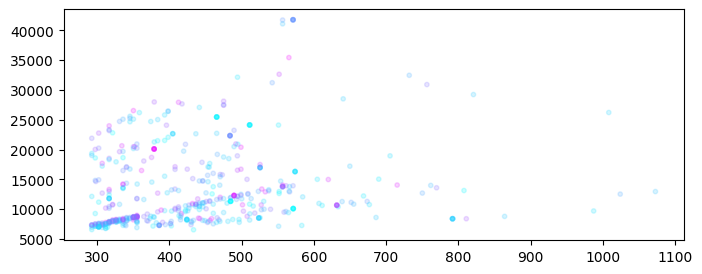

In [484]:
fig, ax = plt.subplots(figsize=(8, 3))

#for cl in sorted(ltv_train[temp_var].unique()):
#for cl in ["Suburban", "Urban", "Rural"]:
ax.scatter(data = ltv_train[
      (ltv_train["ltv_band"].isin(["A_2_Basic", "A_2_Extended", "A_2_Premium"]))
      #(ltv_train["ltv_band"]==cl)
      & (ltv_train["Location Code"]=="Suburban")
      & (ltv_train["Income"]> 0)],
             x="Total Claim Amount", y="Customer Lifetime Value",
             alpha=.2, s=10, cmap="cool", c="Income")
plt.show()

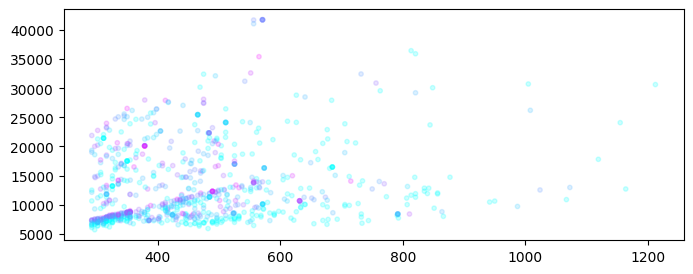

In [483]:
fig, ax = plt.subplots(figsize=(8, 3))

#for cl in sorted(ltv_train[temp_var].unique()):
#for cl in ["Suburban", "Urban", "Rural"]:
ax.scatter(data = ltv_train[
      (ltv_train["ltv_band"].isin(["A_2_Basic", "A_2_Extended", "A_2_Premium"]))
      #(ltv_train["ltv_band"]==cl)
      & (ltv_train["Location Code"]=="Suburban")],
             x="Total Claim Amount", y="Customer Lifetime Value",
             alpha=.2, s=10, cmap="cool", c="Income")
plt.show()

In [506]:
print(cat_policy_vars)

['Coverage', 'Number of Open Complaints', 'Policy Type', 'Policy Level', 'Renew Offer Type', 'Sales Channel', 'Response']


In [520]:
list(ltv_train.corr())

<ipython-input-520-47e47562b01a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  list(ltv_train.corr())


['Customer Lifetime Value',
 'Effective To Date',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount',
 'Customer Lifetime Value clipped',
 'rel_claim',
 'Monthly Premium Auto_noisy']

In [526]:
ltv_train["Months Since Last Claim"].describe()

count    7763.000000
mean       15.134999
std        10.076201
min         0.000000
25%         6.000000
50%        14.000000
75%        23.000000
max        35.000000
Name: Months Since Last Claim, dtype: float64

In [527]:
ltv_train["pct_time_since_last_claim"] = ltv_train["Months Since Last Claim"] / (ltv_train["Months Since Policy Inception"] + 1)

In [525]:
ltv_train["Effective To Date"].describe()

count    7763.000000
mean       87.429473
std        93.783949
min         0.000000
25%        24.000000
50%        49.000000
75%       120.000000
max       335.000000
Name: Effective To Date, dtype: float64

In [524]:
ltv_train["Months Since Policy Inception"].describe()

count    7763.000000
mean       48.190777
std        27.960891
min         0.000000
25%        24.000000
50%        48.000000
75%        71.500000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [531]:
ltv_train["pct_time_since_last_claim"].describe(percentiles=[.9, .95, .99])

count    7763.000000
mean        0.804651
std         2.190215
min         0.000000
50%         0.304348
90%         1.537436
95%         2.750000
99%        10.563333
max        33.000000
Name: pct_time_since_last_claim, dtype: float64

In [ ]:
ltv_train["pct_time_since_last_claim"].describe()

In [532]:
ltv_train["no_claims_since_inception"] = (
    ltv_train["Months Since Policy Inception"] < ltv_train["Months Since Last Claim"])

In [550]:
ltv_train["claim_vs_n_complaints"] = ltv_train["Total Claim Amount"]/(
    ltv_train["Number of Open Complaints"] + 1
)

In [552]:
ltv_train["claim_per_active_months"] = ltv_train["Total Claim Amount"]/(
    ltv_train["Months Since Policy Inception"] + 1
)

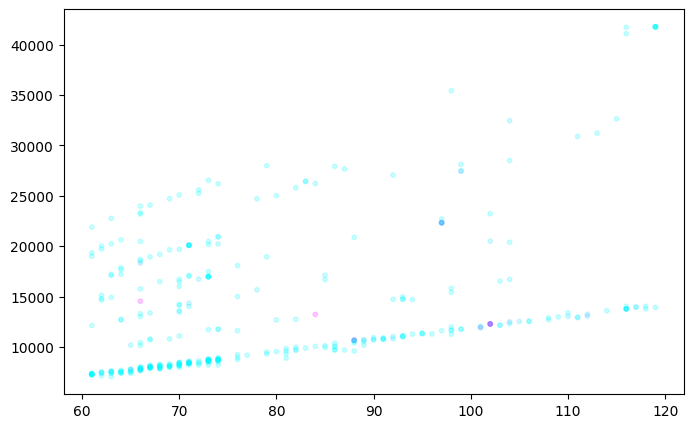

In [553]:
fig, ax = plt.subplots(figsize=(8, 5))

temp_var = "claim_per_active_months"
ax.scatter(data = ltv_train[
      (ltv_train["ltv_band"].isin(["A_2_Basic", "A_2_Extended", "A_2_Premium"]))
      #&(ltv_train["Income"]>0)
      #&(ltv_train["Education"]=="College")
      #&(ltv_train["Marital Status"]=="Married")
      & (ltv_train["Location Code"]=="Suburban")
      & (ltv_train["EmploymentStatus"] == "Employed")
      ],
             x="Monthly Premium Auto", y="Customer Lifetime Value",
             alpha=.2, s=10, cmap="cool", c=temp_var)
#ax.set_xlim(250, 800)
plt.show()

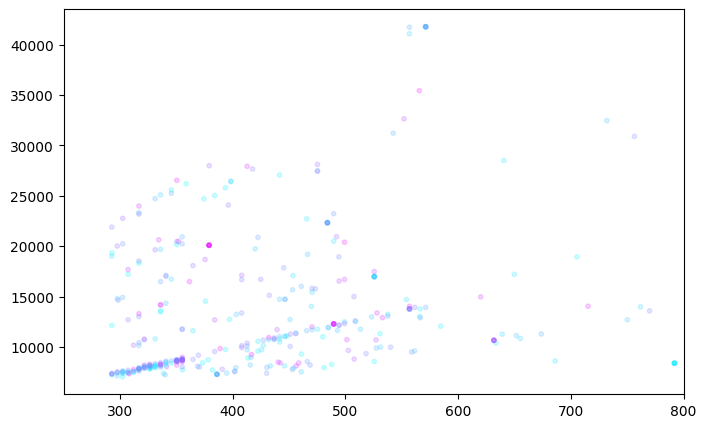

In [543]:
fig, ax = plt.subplots(figsize=(8, 5))

temp_var = "Income"
ax.scatter(data = ltv_train[
      (ltv_train["ltv_band"].isin(["A_2_Basic", "A_2_Extended", "A_2_Premium"]))
      #&(ltv_train["Income"]>0)
      #&(ltv_train["Education"]=="College")
      #&(ltv_train["Marital Status"]=="Married")
      & (ltv_train["Location Code"]=="Suburban")
      & (ltv_train["EmploymentStatus"] == "Employed")
      ],
             x="Total Claim Amount", y="Customer Lifetime Value",
             alpha=.2, s=10, cmap="cool", c=temp_var)
ax.set_xlim(250, 800)
plt.show()

Bachelor
College
Doctor
High School or Below
Master


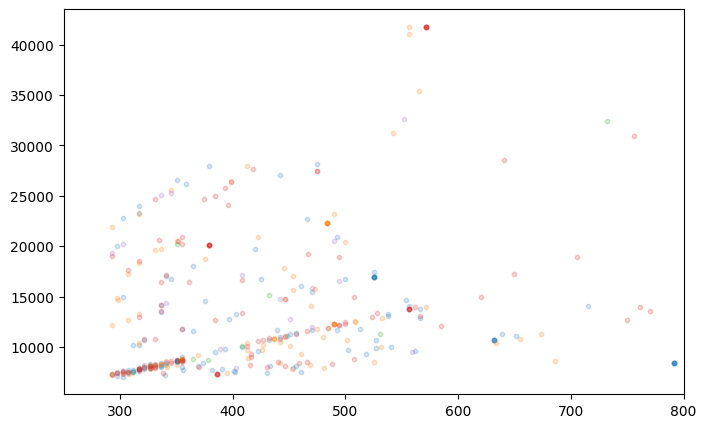

In [537]:
fig, ax = plt.subplots(figsize=(8, 5))

temp_var = "Education"
for cl in sorted(ltv_train[temp_var].unique()):
#for cl in ["Suburban", "Urban", "Rural"]:
#for cl in ["Employed", "Unemployed"]:
  print(cl)
  ax.scatter(data = ltv_train[
      (ltv_train["ltv_band"].isin(["A_2_Basic", "A_2_Extended", "A_2_Premium"]))
      &(ltv_train[temp_var]==cl)
      & (ltv_train["Location Code"]=="Suburban")
      & (ltv_train["EmploymentStatus"] == "Employed")
      ],
             x="Total Claim Amount", y="Customer Lifetime Value",
             alpha=.2, s=10)
ax.set_xlim(250, 800)
plt.show()

Employed
Unemployed


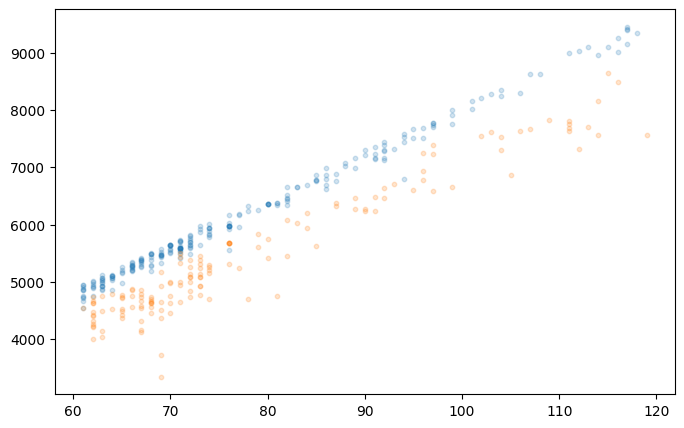

In [557]:
fig, ax = plt.subplots(figsize=(8, 5))

temp_var = "EmploymentStatus"
#for cl in sorted(ltv_train[temp_var].unique()):
#for cl in ["Suburban", "Urban", "Rural"]:
for cl in ["Employed", "Unemployed"]:
  print(cl)
  ax.scatter(data = ltv_train[
      (ltv_train["ltv_band"].isin(["A_3_Basic", "A_3_Extended", "A_3_Premium"]))
      &(ltv_train[temp_var]==cl)
      & (ltv_train["Location Code"]=="Suburban")
      #& (ltv_train["Income"]> 0)
      ],
             x="Monthly Premium Auto", y="Customer Lifetime Value",
             alpha=.2, s=10)
#ax.set_xlim(250, 800)
plt.show()

In [572]:
temp = ltv_train[
      #(ltv_train["ltv_band"].isin(["A_3_Basic", "A_3_Extended", "A_3_Premium"]))
      #&(ltv_train[temp_var]==cl)
      (ltv_train["Number of Policies"]==5)
      #&(ltv_train["Location Code"]=="Rural")
      #& (ltv_train["Income"]> 0)
      ].copy()

In [573]:
pd.crosstab(temp["EmploymentStatus"], temp["ltv_group"])

ltv_group          G2  G3
EmploymentStatus         
Disabled           12   0
Employed          204   1
Medical Leave      14   0
Retired            21   0
Unemployed         87   0

Employed
Unemployed


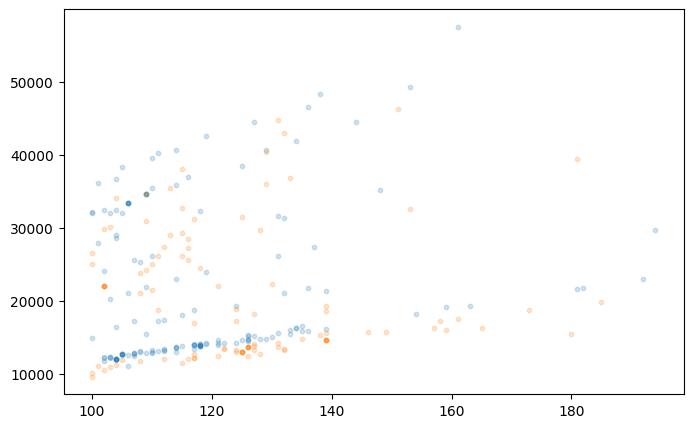

In [554]:
fig, ax = plt.subplots(figsize=(8, 5))

temp_var = "EmploymentStatus"
#for cl in sorted(ltv_train[temp_var].unique()):
#for cl in ["Suburban", "Urban", "Rural"]:
for cl in ["Employed", "Unemployed"]:
  print(cl)
  ax.scatter(data = ltv_train[
      (ltv_train["ltv_band"].isin(["B_2_Basic", "B_2_Extended", "B_2_Premium"]))
      &(ltv_train[temp_var]==cl)
      & (ltv_train["Location Code"]=="Suburban")
      #& (ltv_train["Income"]> 0)
      ],
             x="Monthly Premium Auto", y="Customer Lifetime Value",
             alpha=.2, s=10)
#ax.set_xlim(250, 800)
plt.show()

Employed
Unemployed


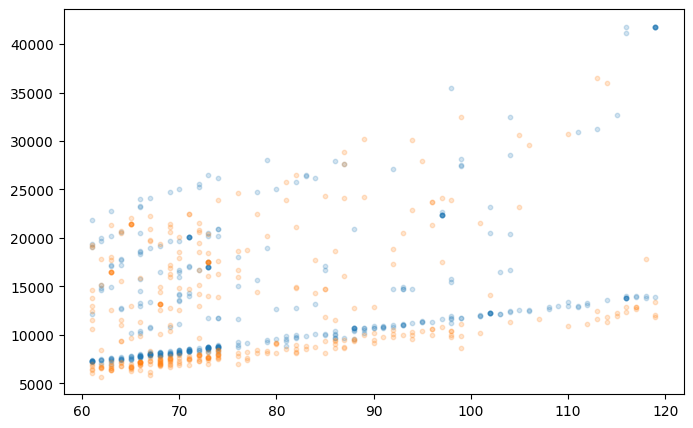

In [544]:
fig, ax = plt.subplots(figsize=(8, 5))

temp_var = "EmploymentStatus"
#for cl in sorted(ltv_train[temp_var].unique()):
#for cl in ["Suburban", "Urban", "Rural"]:
for cl in ["Employed", "Unemployed"]:
  print(cl)
  ax.scatter(data = ltv_train[
      (ltv_train["ltv_band"].isin(["A_2_Basic", "A_2_Extended", "A_2_Premium"]))
      &(ltv_train[temp_var]==cl)
      & (ltv_train["Location Code"]=="Suburban")
      #& (ltv_train["Income"]> 0)
      ],
             x="Monthly Premium Auto", y="Customer Lifetime Value",
             alpha=.2, s=10)
#ax.set_xlim(250, 800)
plt.show()

Employed
Unemployed


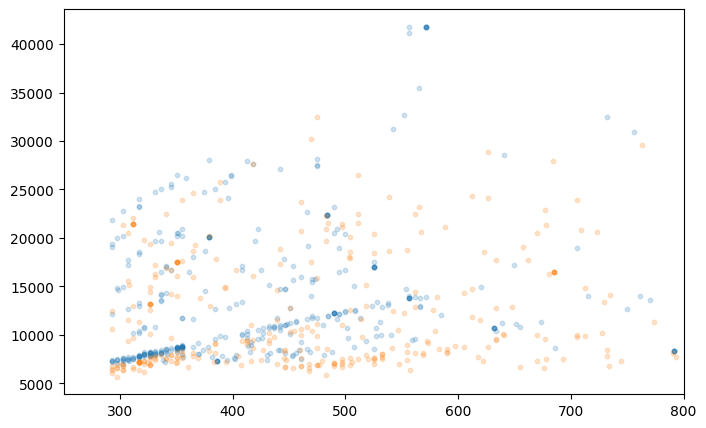

In [496]:
fig, ax = plt.subplots(figsize=(8, 5))

temp_var = "EmploymentStatus"
#for cl in sorted(ltv_train[temp_var].unique()):
#for cl in ["Suburban", "Urban", "Rural"]:
for cl in ["Employed", "Unemployed"]:
  print(cl)
  ax.scatter(data = ltv_train[
      (ltv_train["ltv_band"].isin(["A_2_Basic", "A_2_Extended", "A_2_Premium"]))
      &(ltv_train[temp_var]==cl)
      & (ltv_train["Location Code"]=="Suburban")
      #& (ltv_train["Income"]> 0)
      ],
             x="Total Claim Amount", y="Customer Lifetime Value",
             alpha=.2, s=10)
ax.set_xlim(250, 800)
plt.show()

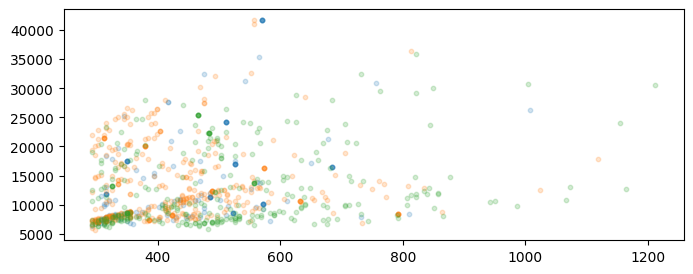

In [488]:
fig, ax = plt.subplots(figsize=(8, 3))

temp_var = "Marital Status"
for cl in sorted(ltv_train[temp_var].unique()):
#for cl in ["Suburban", "Urban", "Rural"]:
  ax.scatter(data = ltv_train[
      (ltv_train["ltv_band"].isin(["A_2_Basic", "A_2_Extended", "A_2_Premium"]))
      &(ltv_train[temp_var]==cl)
      & (ltv_train["Location Code"]=="Suburban")
      #& (ltv_train["Income"]> 0)
      ],
             x="Total Claim Amount", y="Customer Lifetime Value",
             alpha=.2, s=10)
plt.show()

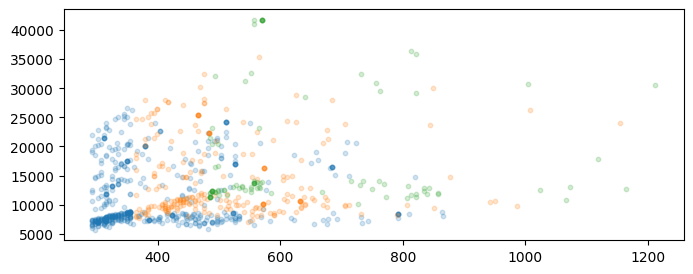

In [481]:
fig, ax = plt.subplots(figsize=(8, 3))

#for cl in sorted(ltv_train[temp_var].unique()):
#for cl in ["Suburban", "Urban", "Rural"]:
for cl in ["A_2_Basic", "A_2_Extended", "A_2_Premium"]:
  ax.scatter(data = ltv_train[
      #(ltv_train["ltv_band"].isin(["A_2_Basic", "A_2_Extended", "A_2_Premium"]))
      (ltv_train["ltv_band"]==cl)
      & (ltv_train["Location Code"]=="Suburban")],
             x="Total Claim Amount", y="Customer Lifetime Value",
             alpha=.2, s=10)
plt.show()

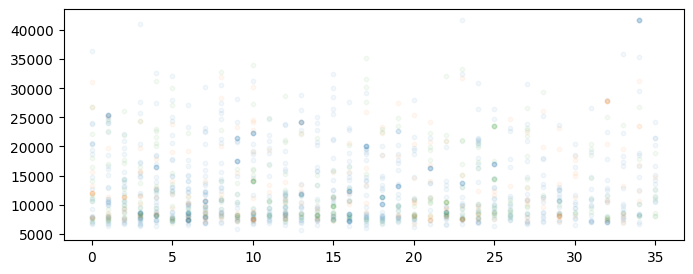

In [479]:
fig, ax = plt.subplots(figsize=(8, 3))

#for cl in sorted(ltv_train[temp_var].unique()):
for cl in ["Suburban", "Urban", "Rural"]:
  ax.scatter(data = ltv_train[
      (ltv_train["ltv_band"].isin(["A_2_Basic", "A_2_Extended", "A_2_Premium"]))
      & (ltv_train["Location Code"]==cl)],
             x="Months Since Last Claim", y="Customer Lifetime Value",
             alpha=.05, s=10)
plt.show()

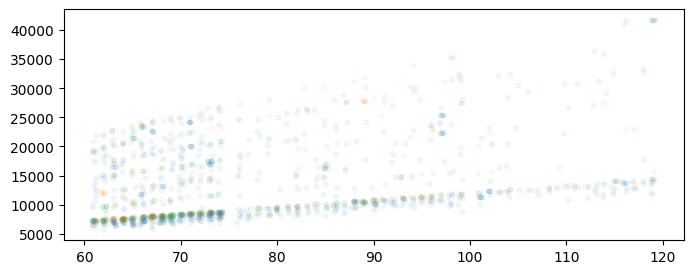

In [476]:
fig, ax = plt.subplots(figsize=(8, 3))

#for cl in sorted(ltv_train[temp_var].unique()):
for cl in ["Suburban", "Urban", "Rural"]:
  ax.scatter(data = ltv_train[
      (ltv_train["ltv_band"].isin(["A_2_Basic", "A_2_Extended", "A_2_Premium"]))
      & (ltv_train["Location Code"]==cl)],
             x="Monthly Premium Auto_noisy", y="Customer Lifetime Value",
             alpha=.05, s=10)
plt.show()

In [463]:
ltv_train.groupby("ltv_band")["Customer Lifetime Value"].describe().round(0).head(25)

count     mean     std      min      25%      50%      75%  \
ltv_band                                                                    
A_1_Basic     1194.0   2574.0   214.0   1898.0   2436.0   2573.0   2734.0   
A_1_Extended   620.0   3370.0   335.0   2377.0   3115.0   3363.0   3634.0   
A_1_Premium    156.0   4250.0   308.0   3173.0   4053.0   4275.0   4452.0   
A_2_Basic      830.0  11590.0  5484.0   5674.0   7626.0   8457.0  15380.0   
A_2_Extended   409.0  14756.0  6822.0   6944.0   9875.0  11124.0  18892.0   
A_2_Premium    140.0  17529.0  8663.0  10190.0  12315.0  13412.0  20150.0   
A_3_Basic      441.0   5165.0   450.0   3342.0   4867.0   5192.0   5517.0   
A_3_Extended   198.0   6680.0   693.0   4706.0   6209.0   6635.0   7243.0   
A_3_Premium     64.0   8372.0   675.0   6582.0   7761.0   8403.0   8941.0   
A_4_Basic      143.0   5187.0   411.0   4068.0   4889.0   5185.0   5488.0   
A_4_Extended    74.0   6577.0   614.0   5313.0   6168.0   6480.0   6981.0   
A_4_Premium     20.0   8492.0   719.0   7445.0   7911.0   8310.0   9179.0   
A_5_Basic      156.0   5174.0   432.0   4160.0   4882.0   5180.0   5532.0   
A_5_Extended    77.0   6651.0   677.0   4984.0   6105.0   6662.0   7164.0   
A_5_Premium     14.0   8199.0   552.0   7413.0   7815.0   8118.0   8549.0   
A_6_Basic      146.0   5206.0   408.0   3872.0   4875.0   5207.0   5542.0   
A_6_Extended    75.0   6745.0   655.0   4518.0   6300.0   6674.0   7269.0   
A_6_Premium     23.0   8569.0   585.0   7325.0   8228.0   8512.0   8989.0   
A_7_Basic      159.0   5125.0   477.0   3538.0   4860.0   5156.0   5425.0   
A_7_Extended    81.0   6642.0   647.0   5099.0   6252.0   6610.0   7057.0   
A_7_Premium     24.0   8637.0   654.0   6595.0   8344.0   8630.0   9118.0   
A_8_Basic      129.0   5266.0   401.0   4225.0   4931.0   5266.0   5593.0   
A_8_Extended    88.0   6625.0   630.0   5140.0   6040.0   6521.0   7164.0   
A_8_Premium     20.0   8608.0   637.0   7036.0   8220.0   8689.0   9067.0   
A_9_Basic      154.0   5220.0   404.0   4113.0   4904.0   5213.0   5532.0   

                  max  
ltv_band               
A_1_Basic      3020.0  
A_1_Extended   4014.0  
A_1_Premium    4782.0  
A_2_Basic     26864.0  
A_2_Extended  35444.0  
A_2_Premium   41788.0  
A_3_Basic      6011.0  
A_3_Extended   7997.0  
A_3_Premium    9453.0  
A_4_Basic      6006.0  
A_4_Extended   8006.0  
A_4_Premium    9588.0  
A_5_Basic      5893.0  
A_5_Extended   7996.0  
A_5_Premium    9320.0  
A_6_Basic      5964.0  
A_6_Extended   8026.0  
A_6_Premium    9591.0  
A_7_Basic      6044.0  
A_7_Extended   7901.0  
A_7_Premium    9581.0  
A_8_Basic      5981.0  
A_8_Extended   7899.0  
A_8_Premium    9555.0  
A_9_Basic      5978.0

A
B
C


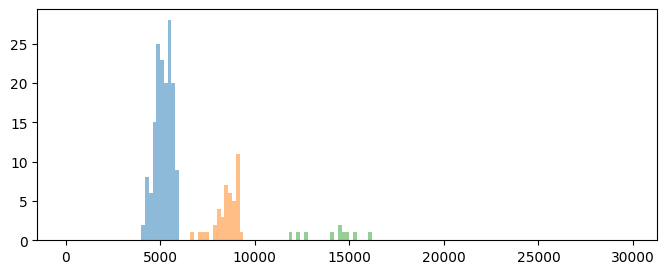

In [446]:
temp_var = "Vehicle Class"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Basic") & (ltv_train["Number of Policies"]==5)].copy()
temp_df["vehicle class group"] = temp_df["Vehicle Class"].map({
    "Two-Door Car": "A", "Sports Car": "B", "Four-Door Car": "A", "SUV": "B",
    "Luxury SUV": "C", "Luxury Car": "C"})
temp_var = "vehicle class group"

for cl in sorted(temp_df[temp_var].unique()):
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  #temp_adj = -5000 if cl == "B" else (-15000 if cl =="C" else 0)
  temp_adj = 0
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"] + temp_adj,
         bins=np.arange(0, 30000, 200), alpha=.5)
plt.show()

A
B
C


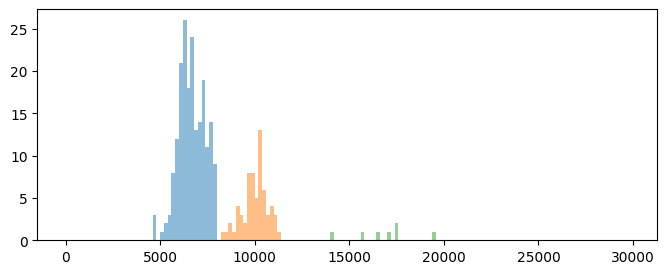

In [443]:
temp_var = "Vehicle Class"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Extended") & (ltv_train["Number of Policies"]==3)].copy()
temp_df["vehicle class group"] = temp_df["Vehicle Class"].map({
    "Two-Door Car": "A", "Sports Car": "B", "Four-Door Car": "A", "SUV": "B",
    "Luxury SUV": "C", "Luxury Car": "C"})
temp_var = "vehicle class group"

for cl in sorted(temp_df[temp_var].unique()):
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  #temp_adj = -5000 if cl == "B" else (-15000 if cl =="C" else 0)
  temp_adj = 0
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"] + temp_adj,
         bins=np.arange(0, 30000, 200), alpha=.5)
plt.show()

A
B
C


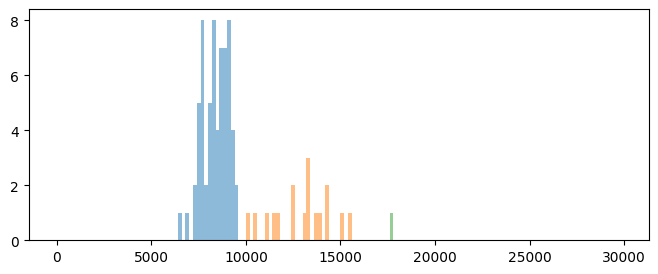

In [444]:
temp_var = "Vehicle Class"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Premium") & (ltv_train["Number of Policies"]==3)].copy()
temp_df["vehicle class group"] = temp_df["Vehicle Class"].map({
    "Two-Door Car": "A", "Sports Car": "B", "Four-Door Car": "A", "SUV": "B",
    "Luxury SUV": "C", "Luxury Car": "C"})
temp_var = "vehicle class group"

for cl in sorted(temp_df[temp_var].unique()):
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  #temp_adj = -5000 if cl == "B" else (-15000 if cl =="C" else 0)
  temp_adj = 0
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"] + temp_adj,
         bins=np.arange(0, 30000, 200), alpha=.5)
plt.show()

A
B
C


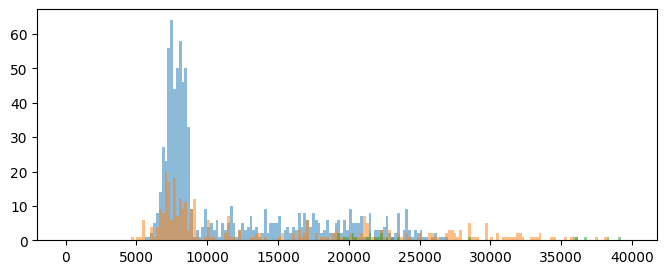

In [430]:
temp_var = "Vehicle Class"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Basic") & (ltv_train["Number of Policies"]==2)].copy()
temp_df["vehicle class group"] = temp_df["Vehicle Class"].map({
    "Two-Door Car": "A", "Sports Car": "B", "Four-Door Car": "A", "SUV": "B",
    "Luxury SUV": "C", "Luxury Car": "C"})
temp_var = "vehicle class group"

for cl in temp_df[temp_var].unique():
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  temp_adj = -5000 if cl == "B" else 0
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"] + temp_adj,
         bins=np.arange(0, 40000, 200), alpha=.5)
plt.show()

Two-Door Car
SUV
Luxury SUV
Luxury Car
Four-Door Car
Sports Car


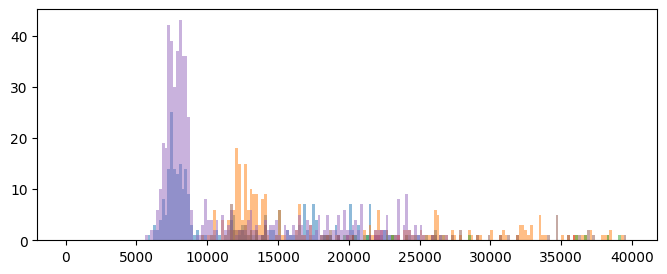

In [396]:
temp_var = "Vehicle Class"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Basic") & (ltv_train["Number of Policies"]==2)].copy()
temp_df["vehicle class group"] = temp_df["Vehicle Class"].map({
    "Two-Door Car": "A", "Sports Car": "B", "Four-Door Car": "A", "SUV": "B",
    "Luxury SUV": "C", "Luxury Car": "C"})
#temp_var = "vehicle class group"

for cl in temp_df[temp_var].unique():
#for cl in ["Two-Door Car", "Sports Car"]:
#for cl in ["Four-Door Car", "SUV"]:
#for cl in ["Luxury SUV", "Luxury Car"]:
  print(cl)
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"],
         bins=np.arange(0, 40000, 200), alpha=.5)
plt.show()

Suburban
Rural
Urban


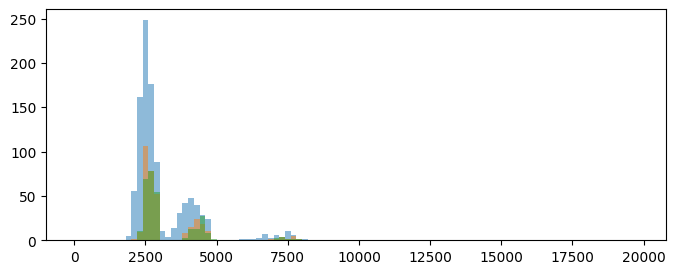

In [363]:
temp_var = "Location Code"
fig, ax = plt.subplots(figsize=(8, 3))
temp_df = ltv_train[
     (ltv_train["Coverage"]=="Basic") & (ltv_train["Number of Policies"]==1)].copy()
for cl in ltv_train[temp_var].unique():
  print(cl)
  ax.hist(temp_df[(temp_df[temp_var]==cl) ][
         "Customer Lifetime Value"],
         bins=np.arange(0, 20000, 200), alpha=.5)
plt.show()

1
3


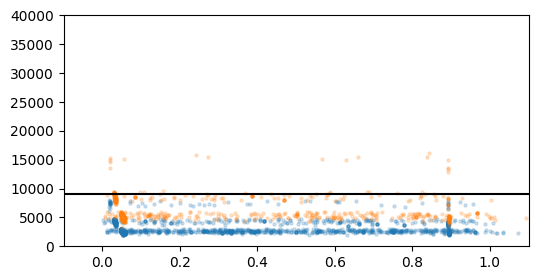

In [359]:
temp_var = "Number of Policies"
fig, ax = plt.subplots(figsize=(6, 3))

#for cl in ltv_train[temp_var].unique():
for cl in [1, 3]:
  print(cl)
  ax.scatter(data=ltv_train[
     (ltv_train["Coverage"]=="Basic") & (ltv_train[temp_var]==cl)],
              x="rel_claim", y="Customer Lifetime Value",
              alpha=.2, s=5)
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(0, 40000)
ax.axhline(9000, color="black")
plt.show()

Suburban
Rural
Urban


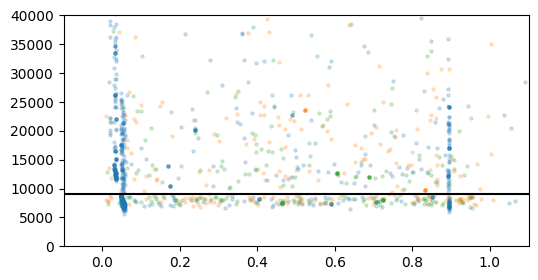

In [355]:
temp_var = "Location Code"
fig, ax = plt.subplots(figsize=(6, 3))

for cl in ltv_train[temp_var].unique():
#for cl in ["Basic"]:
  print(cl)
  ax.scatter(data=ltv_train[
      (ltv_train["Number of Policies"]==2)
      & (ltv_train["Coverage"]=="Basic") & (ltv_train[temp_var]==cl)],
              x="rel_claim", y="Customer Lifetime Value",
              alpha=.2, s=5)
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(0, 40000)
ax.axhline(9000, color="black")
plt.show()

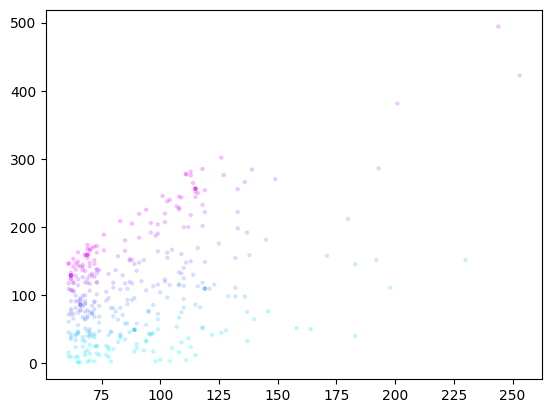

In [350]:
plt.scatter(data=ltv_train[
      (ltv_train["Number of Policies"]==2)
      & (ltv_train["Location Code"]=="Rural")],
              x="Monthly Premium Auto", y="Total Claim Amount",
            alpha=.2, cmap="cool", c="rel_claim", s=5)

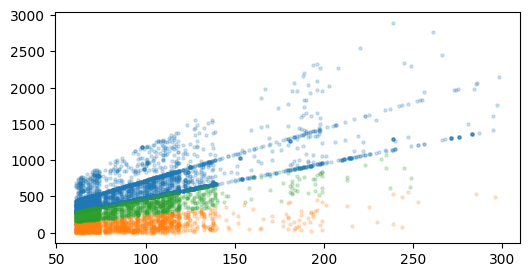

In [145]:
temp_var = "Location Code"
fig, ax = plt.subplots(figsize=(6, 3))

for cl in ltv_train[temp_var].unique():
  ax.scatter(data=ltv_train[ltv_train[temp_var]==cl],
              x="Monthly Premium Auto", y="Total Claim Amount",
              alpha=.2, s=5)
plt.show()

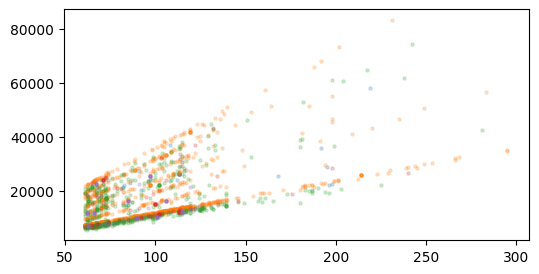

In [195]:
temp_var = "EmploymentStatus"
fig, ax = plt.subplots(figsize=(6, 3))

for cl in ltv_train_2pol[temp_var].unique():
  ax.scatter(data=ltv_train_2pol[ltv_train_2pol[temp_var]==cl],
              x="Monthly Premium Auto", y="Customer Lifetime Value",
              alpha=.2, s=5)
plt.show()

In [203]:
cat_personal_vars

['State',
 'Location Code',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Marital Status',
 'Vehicle Class',
 'Vehicle Size']

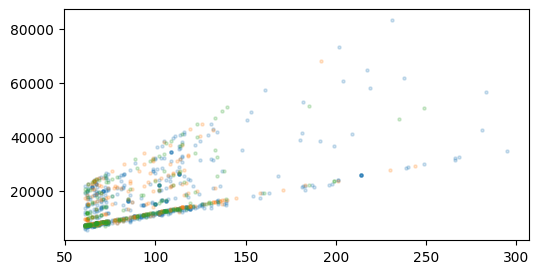

In [211]:
temp_var = "Location Code"
fig, ax = plt.subplots(figsize=(6, 3))

for cl in ltv_train_2pol[temp_var].unique():
  ax.scatter(data=ltv_train_2pol[(ltv_train_2pol[temp_var]==cl) & (ltv_train_2pol["Marital Status"]=="Married")],
              x="Monthly Premium Auto", y="Customer Lifetime Value",
              alpha=.2, s=5)
plt.show()

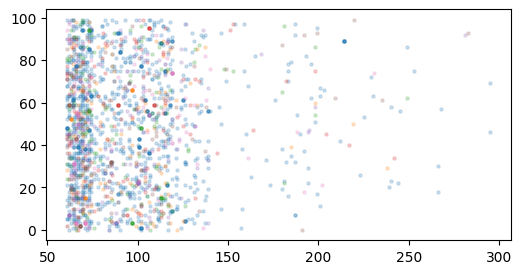

In [201]:
temp_var = "ltv_group"
fig, ax = plt.subplots(figsize=(6, 3))

for cl in ltv_train_2pol[temp_var].unique():
  ax.scatter(data=ltv_train_2pol[ltv_train_2pol[temp_var]==cl],
              x="Monthly Premium Auto", y="Months Since Policy Inception",
              alpha=.2, s=5)
plt.show()

In [221]:
pd.crosstab(ltv_train_2pol[ltv_train_2pol["Coverage"]=="Basic"]["ltv_group"],
            ltv_train_2pol[ltv_train_2pol["Coverage"]=="Basic"]["Policy Type"], normalize="index").round(2)

Policy Type  Corporate Auto  Personal Auto  Special Auto
ltv_group                                               
G3                     0.21           0.74          0.05
G4                     0.24           0.70          0.06
G5                     0.11           0.82          0.07
G6                     0.28           0.66          0.06
G7                     0.20           0.75          0.05
G8                     0.13           0.87          0.00
G9                     0.18           0.71          0.11

In [226]:
pd.crosstab(ltv_train_2pol["ltv_group"], ltv_train_2pol["Number of Open Complaints"], normalize="index").round(2)

Number of Open Complaints     0     1     2     3     4     5
ltv_group                                                    
G3                         0.80  0.11  0.03  0.03  0.01  0.01
G4                         0.76  0.16  0.04  0.03  0.00  0.01
G5                         0.79  0.13  0.03  0.04  0.01  0.01
G6                         0.78  0.13  0.06  0.01  0.01  0.00
G7                         0.83  0.13  0.02  0.02  0.01  0.00
G8                         0.78  0.12  0.05  0.05  0.01  0.01
G9                         0.84  0.08  0.08  0.01  0.00  0.00

In [228]:
pd.crosstab(ltv_train_2pol["Vehicle Class"], ltv_train_2pol["Vehicle Size"])

Vehicle Size   Large  Medsize  Small
Vehicle Class                       
Four-Door Car     97      679    187
Luxury Car         2       16     18
Luxury SUV         6       24      5
SUV               30      298     78
Sports Car        17       62     13
Two-Door Car      41      298     77

In [197]:
pd.crosstab(ltv_train_2pol["Gender"], ltv_train_2pol["EmploymentStatus"])

EmploymentStatus  Disabled  Employed  Medical Leave  Retired  Unemployed
Gender                                                                  
F                       57       608             41       30         238
M                       37       586             50       40         261

In [196]:
pd.crosstab(ltv_train_2pol["ltv_group"], ltv_train_2pol["EmploymentStatus"])

EmploymentStatus  Disabled  Employed  Medical Leave  Retired  Unemployed
ltv_group                                                               
G3                      62       720             50       35         281
G4                       5        83              9        6          26
G5                       5        68              7       16          39
G6                       9        87              3        1          56
G7                       8        67              6        8          43
G8                       2        85              5        0          37
G9                       3        84             11        4          17

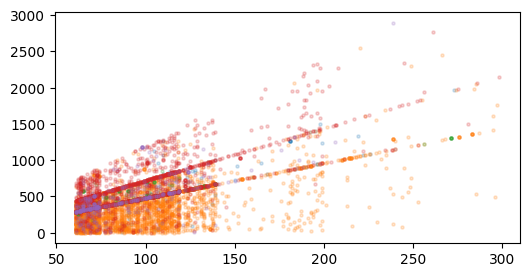

In [147]:
temp_var = "EmploymentStatus"
fig, ax = plt.subplots(figsize=(6, 3))

for cl in ltv_train[temp_var].unique():
  ax.scatter(data=ltv_train[ltv_train[temp_var]==cl],
              x="Monthly Premium Auto", y="Total Claim Amount",
              alpha=.2, s=5)
plt.show()

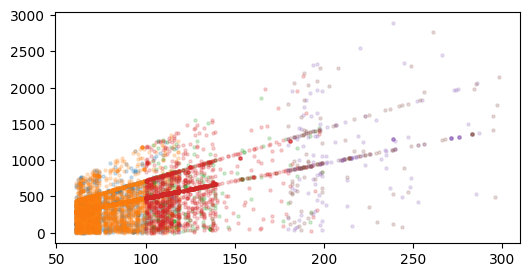

In [150]:
temp_var = "Vehicle Class"
fig, ax = plt.subplots(figsize=(6, 3))

for cl in ltv_train[temp_var].unique():
  ax.scatter(data=ltv_train[ltv_train[temp_var]==cl],
              x="Monthly Premium Auto", y="Total Claim Amount",
              alpha=.2, s=5)
plt.show()

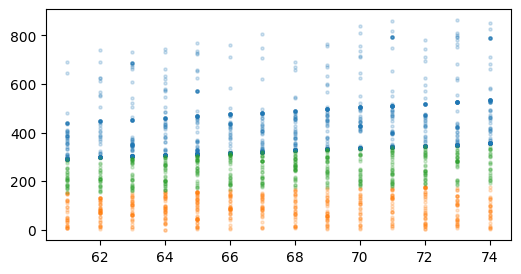

In [170]:
temp_var = "Location Code"
fig, ax = plt.subplots(figsize=(6, 3))

for cl in ltv_train[temp_var].unique():
  ax.scatter(data=ltv_train[
      (ltv_train["Coverage"]=="Basic")
      & (ltv_train["Vehicle Class"]=="Four-Door Car") &
      (ltv_train[temp_var]==cl)],
             x="Monthly Premium Auto", y="Total Claim Amount",
             alpha=.2, s=5)
plt.show()

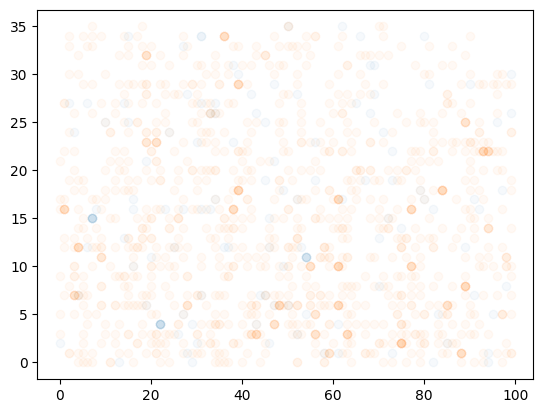

In [232]:
plt.scatter(ltv_train_2pol[ltv_train_2pol["ltv_group"]=="G4"]["Months Since Policy Inception"],
            ltv_train_2pol[ltv_train_2pol["ltv_group"]=="G4"]["Months Since Last Claim"], alpha=.04)
plt.scatter(ltv_train_2pol[ltv_train_2pol["ltv_group"]=="G3"]["Months Since Policy Inception"],
            ltv_train_2pol[ltv_train_2pol["ltv_group"]=="G3"]["Months Since Last Claim"], alpha=.04)

In [168]:
ltv_train["Vehicle Class"].unique()

array(['Two-Door Car', 'Four-Door Car', 'Sports Car', 'SUV', 'Luxury SUV',
       'Luxury Car'], dtype=object)

In [177]:
pd.crosstab(ltv_train[ltv_train["Location Code"]=="Urban"]["State"],
            ltv_train[ltv_train["Location Code"]=="Urban"]["ltv_group"])

ltv_group    G1   G2  G3  G4  G5  G6  G7  G8  G9
State                                           
Arizona      63  120  34   2   6   4   4   8   5
California  143  214  69  12   6  10   3   6   8
Nevada       41   54  24   0   5   3   0   1   5
Oregon      118  170  57   8   7   3   8   7   4
Washington   42   45  16   1   4   2   0   3   2

In [184]:
pd.crosstab(ltv_train["Number of Policies"],
            ltv_train["ltv_group"], normalize="index").round(3)

ltv_group             G1     G2     G3     G4     G5    G6     G7     G8  \
Number of Policies                                                         
1                   0.91  0.090  0.000  0.000  0.000  0.00  0.000  0.000   
2                   0.00  0.000  0.589  0.066  0.069  0.08  0.068  0.066   
3                   0.00  0.997  0.003  0.000  0.000  0.00  0.000  0.000   
4                   0.00  0.994  0.006  0.000  0.000  0.00  0.000  0.000   
5                   0.00  0.997  0.003  0.000  0.000  0.00  0.000  0.000   
6                   0.00  0.991  0.009  0.000  0.000  0.00  0.000  0.000   
7                   0.00  0.989  0.011  0.000  0.000  0.00  0.000  0.000   
8                   0.00  1.000  0.000  0.000  0.000  0.00  0.000  0.000   
9                   0.00  0.997  0.003  0.000  0.000  0.00  0.000  0.000   

ltv_group              G9  
Number of Policies         
1                   0.000  
2                   0.061  
3                   0.000  
4                   0.000  
5                   0.000  
6                   0.000  
7                   0.000  
8                   0.000  
9                   0.000

In [582]:
ltv_train_2pol = ltv_train[ltv_train["Number of Policies"]==2].copy()

In [208]:
ltv_train_2pol["Marital Status"].value_counts()

Married     1094
Single       523
Divorced     331
Name: Marital Status, dtype: int64

In [574]:
ltv_train_g4plus = ltv_train[~ltv_train["ltv_group"].isin(["G1", "G2", "G3"])].copy()

In [579]:
ltv_train[(ltv_train["ltv_group"] == "G3") & (ltv_train["Number of Policies"]==2)].nunique()

Customer                           1148
State                                 5
Customer Lifetime Value            1008
Response                              2
Coverage                              3
Education                             5
Effective To Date                    59
EmploymentStatus                      5
Gender                                2
Income                              743
Location Code                         3
Marital Status                        3
Monthly Premium Auto                123
Months Since Last Claim              36
Months Since Policy Inception       100
Number of Open Complaints             6
Number of Policies                    1
Policy Type                           3
Policy                                9
Renew Offer Type                      4
Sales Channel                         4
Total Claim Amount                  735
Vehicle Class                         6
Vehicle Size                          3
Policy Level                          3


In [576]:
ltv_train_g4plus.nunique()

Customer                           800
State                                5
Customer Lifetime Value            701
Response                             2
Coverage                             3
Education                            5
Effective To Date                   59
EmploymentStatus                     5
Gender                               2
Income                             504
Location Code                        3
Marital Status                       3
Monthly Premium Auto               109
Months Since Last Claim             36
Months Since Policy Inception      100
Number of Open Complaints            6
Number of Policies                   1
Policy Type                          3
Policy                               9
Renew Offer Type                     4
Sales Channel                        4
Total Claim Amount                 527
Vehicle Class                        6
Vehicle Size                         3
Policy Level                         3
Customer Lifetime Value c

In [186]:
pd.crosstab(ltv_train["ltv_group"],
            ltv_train["Number of Policies"], normalize="index").round(3)

Number of Policies      1      2      3      4      5      6      7      8  \
ltv_group                                                                    
G1                  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
G2                  0.076  0.000  0.302  0.104  0.103  0.097  0.110  0.102   
G3                  0.000  0.988  0.003  0.002  0.001  0.003  0.003  0.000   
G4                  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000   
G5                  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000   
G6                  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000   
G7                  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000   
G8                  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000   
G9                  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000   

Number of Policies      9  
ltv_group                  
G1                  0.000  
G2                  0.107  
G3                  0.001  
G4                  0.000  
G5                  0.000  
G6                  0.000  
G7                  0.000  
G8                  0.000  
G9                  0.000

In [183]:
ltv_train["Number of Policies"].value_counts()

1    2770
2    1948
3     995
7     365
9     351
4     342
5     339
8     333
6     320
Name: Number of Policies, dtype: int64

In [142]:
cat_personal_vars

['State',
 'Location Code',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Marital Status',
 'Vehicle Class',
 'Vehicle Size']

In [608]:
ltv_train_2pol["is_G3"] = ltv_train_2pol["ltv_group"] == "G3"

In [616]:
pd.crosstab(ltv_train_2pol[ltv_train_2pol["State"]=="Arizona"]["is_G3"],
            ltv_train_2pol[ltv_train_2pol["State"]=="Arizona"]["Location Code"],
            normalize="columns"
            ).round(3)

Location Code  Rural  Suburban  Urban
is_G3                                
False          0.359      0.36  0.475
True           0.641      0.64  0.525

In [617]:
pd.crosstab(ltv_train_2pol[ltv_train_2pol["State"]=="California"]["is_G3"],
            ltv_train_2pol[ltv_train_2pol["State"]=="California"]["Location Code"],
            normalize="columns"
            ).round(3)

Location Code  Rural  Suburban  Urban
is_G3                                
False          0.395     0.396  0.398
True           0.605     0.604  0.602

In [621]:
pd.crosstab(ltv_train_2pol[ltv_train_2pol["State"]=="Nevada"]["is_G3"],
            ltv_train_2pol[ltv_train_2pol["State"]=="Nevada"]["Location Code"],
            normalize="columns"
            ).round(3)

Location Code  Rural  Suburban  Urban
is_G3                                
False          0.381     0.466  0.368
True           0.619     0.534  0.632

In [622]:
pd.crosstab(ltv_train_2pol[ltv_train_2pol["State"]=="Oregon"]["is_G3"],
            ltv_train_2pol[ltv_train_2pol["State"]=="Oregon"]["Location Code"],
            normalize="columns"
            ).round(3)

Location Code  Rural  Suburban  Urban
is_G3                                
False          0.477     0.418  0.398
True           0.523     0.582  0.602

In [623]:
pd.crosstab(ltv_train_2pol[ltv_train_2pol["State"]=="Washington"]["is_G3"],
            ltv_train_2pol[ltv_train_2pol["State"]=="Washington"]["Location Code"],
            normalize="columns"
            ).round(3)

Location Code  Rural  Suburban  Urban
is_G3                                
False          0.417     0.481  0.429
True           0.583     0.519  0.571

In [618]:
pd.crosstab(ltv_train_2pol["is_G3"], ltv_train_2pol["State"],
            normalize="columns"
            ).round(3)

State  Arizona  California  Nevada  Oregon  Washington
is_G3                                                 
False     0.38       0.397   0.429   0.427       0.459
True      0.62       0.603   0.571   0.573       0.541

In [613]:
pd.crosstab(ltv_train_2pol["is_G3"], ltv_train_2pol["Location Code"],
            normalize="columns"
            ).round(3)

Location Code  Rural  Suburban  Urban
is_G3                                
False          0.414      0.41  0.411
True           0.586      0.59  0.589

In [624]:
pd.crosstab(ltv_train_2pol[ltv_train_2pol["Gender"]=="F"]["is_G3"],
            ltv_train_2pol[ltv_train_2pol["Gender"]=="F"]["Location Code"],
            normalize="columns"
            ).round(3)

Location Code  Rural  Suburban  Urban
is_G3                                
False          0.417     0.443  0.457
True           0.583     0.557  0.543

In [625]:
pd.crosstab(ltv_train_2pol[ltv_train_2pol["Gender"]=="M"]["is_G3"],
            ltv_train_2pol[ltv_train_2pol["Gender"]=="M"]["Location Code"],
            normalize="columns"
            ).round(3)

Location Code  Rural  Suburban  Urban
is_G3                                
False          0.409     0.381  0.361
True           0.591     0.619  0.639

In [627]:
pd.crosstab(ltv_train_2pol["is_G3"],
            ltv_train_2pol["EmploymentStatus"],
            normalize="columns"
            ).round(3)

EmploymentStatus  Disabled  Employed  Medical Leave  Retired  Unemployed
is_G3                                                                   
False                 0.34     0.397          0.451      0.5       0.437
True                  0.66     0.603          0.549      0.5       0.563

In [612]:
pd.crosstab(ltv_train_2pol["is_G3"], ltv_train_2pol["Gender"],
            normalize="columns"
            ).round(3)

Gender      F      M
is_G3               
False   0.439  0.382
True    0.561  0.618

In [585]:
ltv_train_2pol["clv_mpa_ratio"] = (
    ltv_train_2pol['Customer Lifetime Value'] - 600)/(
        ltv_train_2pol["Monthly Premium Auto"])

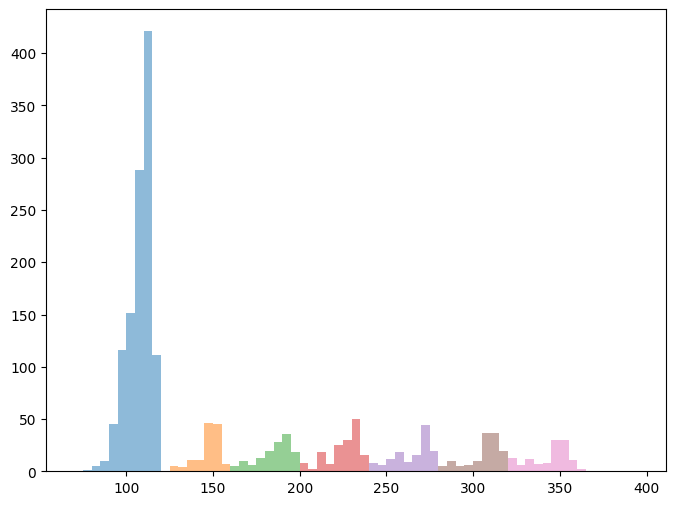

In [592]:
fig, ax = plt.subplots(figsize=(8, 6))
for x in sorted(ltv_train_2pol["ltv_group"].unique()):
  ax.hist(ltv_train_2pol[ltv_train_2pol["ltv_group"]==x][
      "clv_mpa_ratio"], bins=np.arange(70, 400, 5), alpha=.5)
plt.show()

In [59]:
ltv_train.corr().round(2)

<ipython-input-59-04362ee16b7c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ltv_train.corr().round(2)


Customer Lifetime Value  Effective To Date  \
Customer Lifetime Value                             1.00              -0.01   
Effective To Date                                  -0.01               1.00   
Income                                              0.02               0.01   
Monthly Premium Auto                                0.40               0.00   
Months Since Last Claim                             0.01              -0.02   
Months Since Policy Inception                       0.01               0.01   
Number of Open Complaints                          -0.03              -0.02   
Number of Policies                                  0.02              -0.01   
Total Claim Amount                                  0.23              -0.02   
Customer Lifetime Value clipped                     0.99              -0.01   

                                 Income  Monthly Premium Auto  \
Customer Lifetime Value            0.02                  0.40   
Effective To Date                  0.01                  0.00   
Income                             1.00                 -0.02   
Monthly Premium Auto              -0.02                  1.00   
Months Since Last Claim           -0.03                  0.00   
Months Since Policy Inception     -0.00                  0.02   
Number of Open Complaints          0.01                 -0.01   
Number of Policies                -0.01                 -0.01   
Total Claim Amount                -0.35                  0.64   
Customer Lifetime Value clipped    0.02                  0.40   

                                 Months Since Last Claim  \
Customer Lifetime Value                             0.01   
Effective To Date                                  -0.02   
Income                                             -0.03   
Monthly Premium Auto                                0.00   
Months Since Last Claim                             1.00   
Months Since Policy Inception                      -0.04   
Number of Open Complaints                          -0.00   
Number of Policies                                  0.01   
Total Claim Amount                                  0.01   
Customer Lifetime Value clipped                     0.00   

                                 Months Since Policy Inception  \
Customer Lifetime Value                                   0.01   
Effective To Date                                         0.01   
Income                                                   -0.00   
Monthly Premium Auto                                      0.02   
Months Since Last Claim                                  -0.04   
Months Since Policy Inception                             1.00   
Number of Open Complaints                                 0.00   
Number of Policies                                       -0.02   
Total Claim Amount                                        0.01   
Customer Lifetime Value clipped                           0.01   

                                 Number of Open Complaints  \
Customer Lifetime Value                              -0.03   
Effective To Date                                    -0.02   
Income                                                0.01   
Monthly Premium Auto                                 -0.01   
Months Since Last Claim                              -0.00   
Months Since Policy Inception                         0.00   
Number of Open Complaints                             1.00   
Number of Policies                                   -0.00   
Total Claim Amount                                   -0.01   
Customer Lifetime Value clipped                      -0.03   

                                 Number of Policies  Total Claim Amount  \
Customer Lifetime Value                        0.02                0.23   
Effective To Date                             -0.01               -0.02   
Income                                        -0.01               -0.35   
Monthly Premium Auto                          -0.01                0.64   
M